In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('data/train.csv')
df_train["date"] = pd.to_datetime(df_train["date"])
df_train.head(25)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [5]:
## Grouping by date and summing sales

df_train_date = df_train.groupby(by="date").agg({"sales": "sum"})
df_train_date = df_train_date.reset_index()
df_train_date["date"] = pd.to_datetime(df_train_date["date"]) ## converting the date column to datetime data type.
df_train_date.head(15)

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
5,2013-01-06,519695.401088
6,2013-01-07,336122.801066
7,2013-01-08,318347.777981
8,2013-01-09,302530.809018
9,2013-01-10,258982.003049


In [6]:
df_train_date.tail(15)

,date,sales
1669,2017-08-01,9.885278e+05
1670,2017-08-02,9.647120e+05
1671,2017-08-03,7.280685e+05
1672,2017-08-04,8.277757e+05
1673,2017-08-05,9.656937e+05
1674,2017-08-06,1.049559e+06
1675,2017-08-07,7.974650e+05
1676,2017-08-08,7.177663e+05
1677,2017-08-09,7.341397e+05
1678,2017-08-10,6.513869e+05


In [7]:
print(len(df_train_date))

1684


## Plotting sales per date (2013-01-01 to 2017-12-31) - Growing trend with seasonality

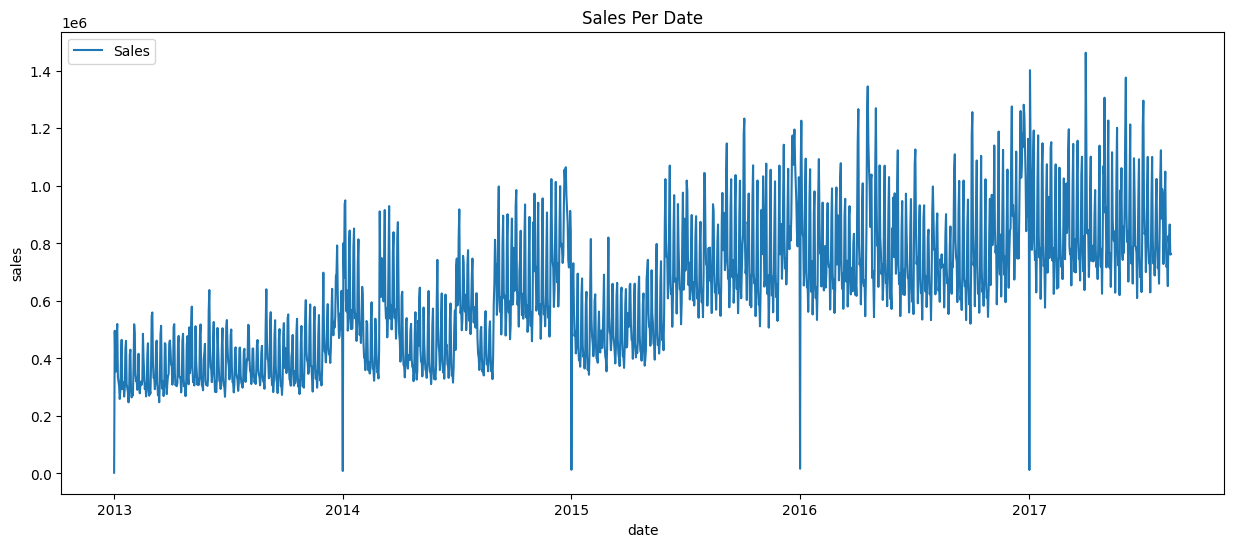

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="date", y="sales", data=df_train_date, ax=ax, dashes=True)
plt.title("Sales Per Date")
plt.legend(["Sales"], loc="upper left")
plt.show()

## Plotting Sales of Automotive Products Per day (2013 to 2017)

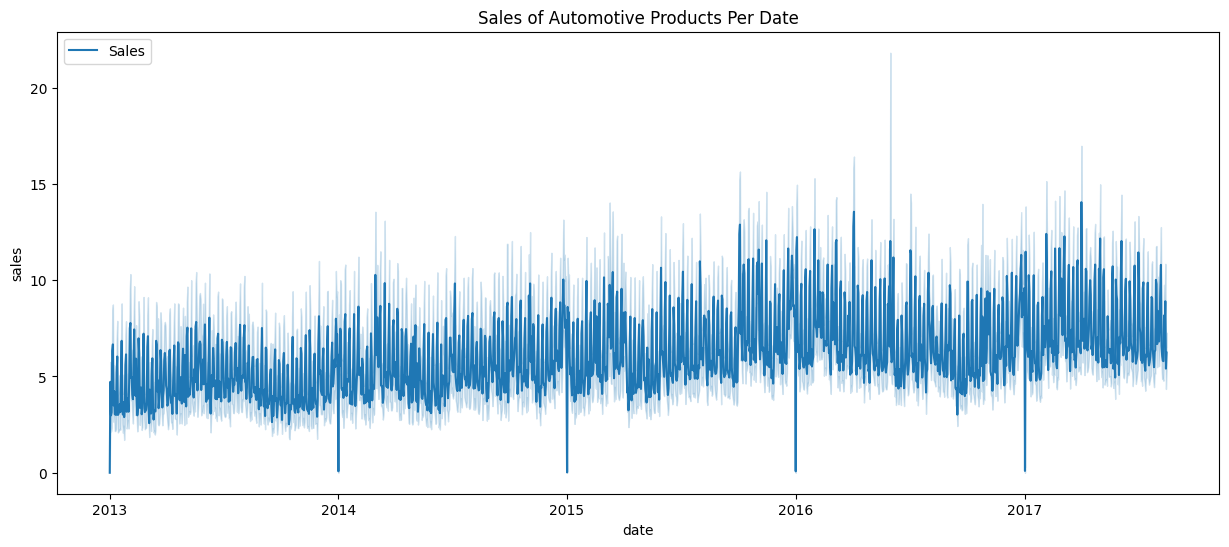

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="date", y="sales", data=df_train.loc[df_train["family"] == "AUTOMOTIVE"], ax=ax, dashes=True)
plt.title("Sales of Automotive Products Per Date")
plt.legend(["Sales"], loc="upper left")
plt.show()

## Plotting Beauty Products Sales per Day (2013 to 2017)

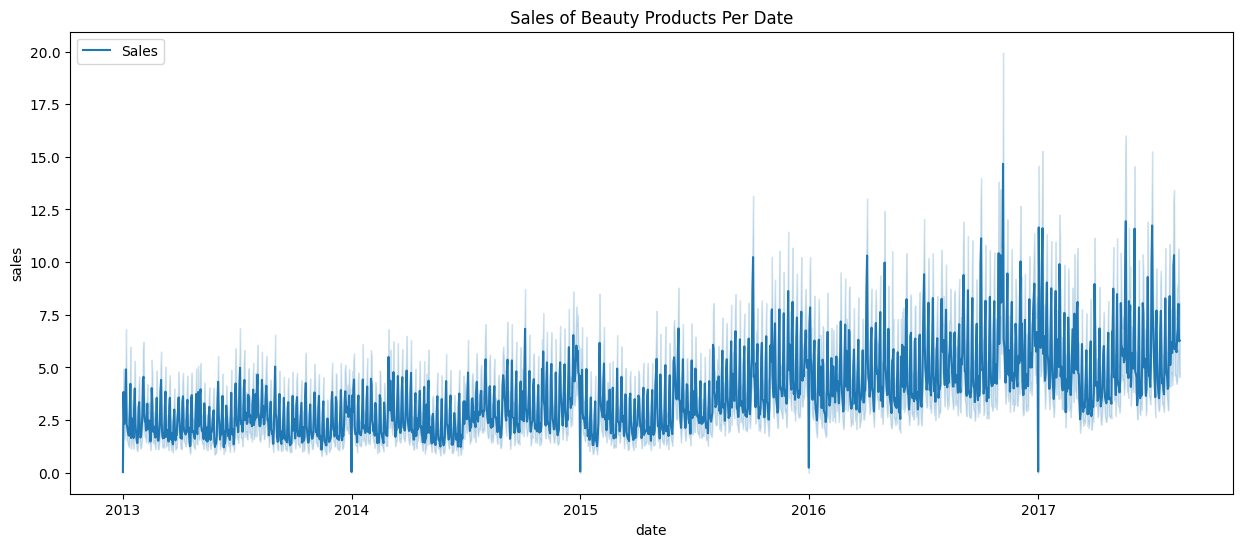

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="date", y="sales", data=df_train.loc[df_train["family"] == "BEAUTY"], ax=ax, dashes=True)
plt.title("Sales of Beauty Products Per Date")
plt.legend(["Sales"], loc="upper left")
plt.show()

## Plotting Sales per Date (for 60 days) - Viewing the Weekly Fluctuations

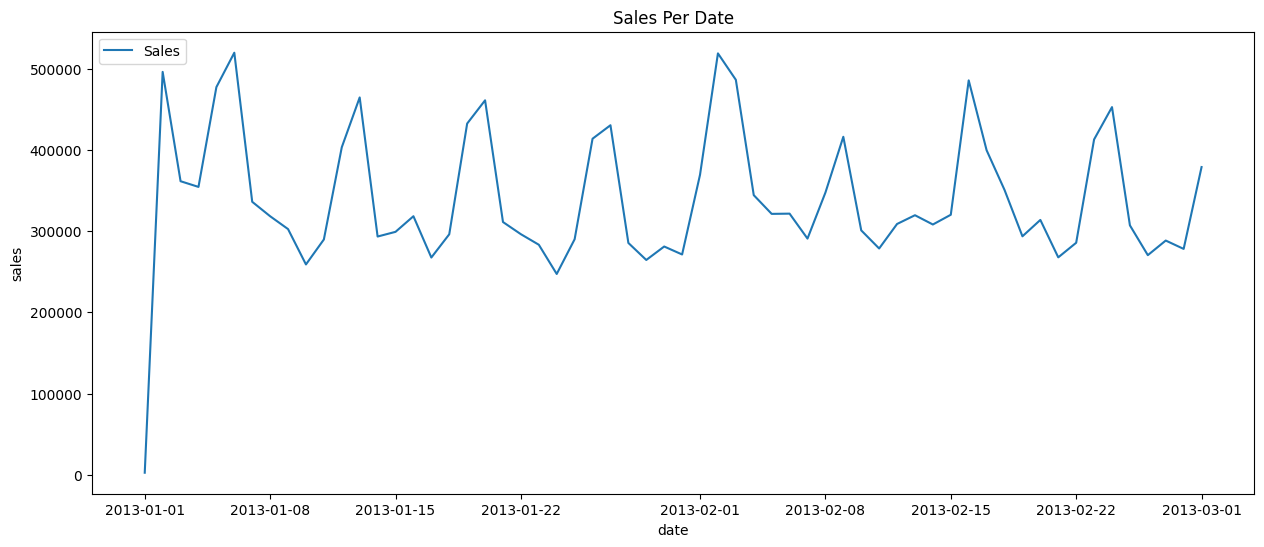

In [11]:
## (Saturday (+1) and Sunday are the most active days)

fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="date", y="sales", data=df_train_date.head(60), ax=ax, dashes=True)
plt.title("Sales Per Date")
plt.legend(["Sales"], loc="upper left")
plt.show()

## Plotting sales per date (2016-02-16 - 2016-06-16) during the earthquake with 7.8 Magnitude - a short spike

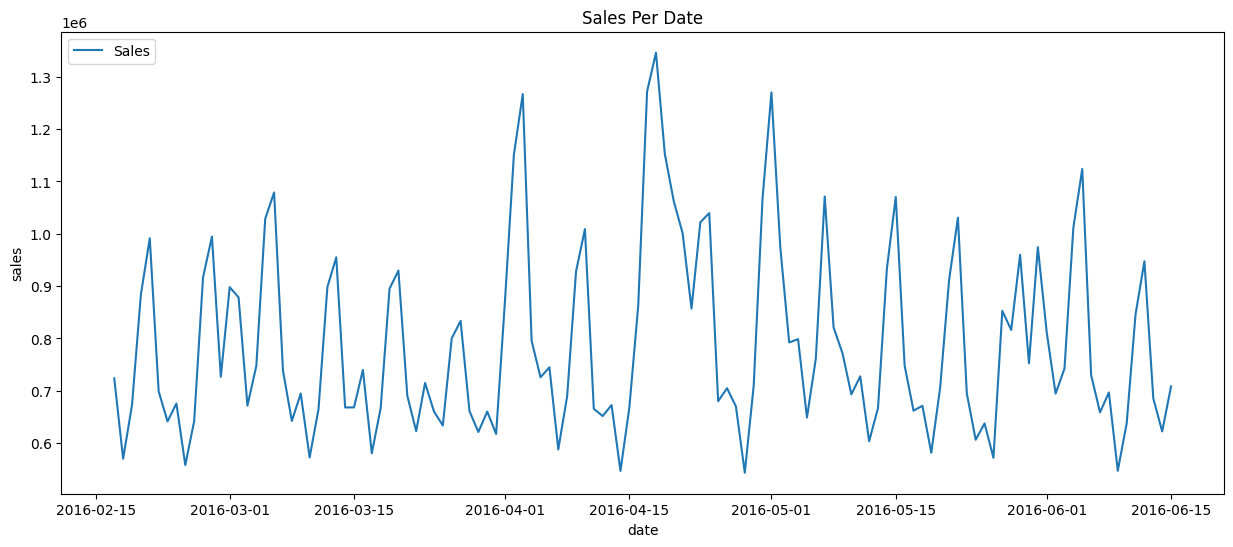

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="date", y="sales", data=df_train_date.loc[(df_train_date["date"] > "2016-02-16") & (df_train_date["date"] < "2016-06-16"), :], ax=ax, dashes=True)
plt.title("Sales Per Date")
plt.legend(["Sales"], loc="upper left")
plt.show()

## Seasonal Decomposition (monthly seasonality) in a year

Index(['date', 'sales'], dtype='object')


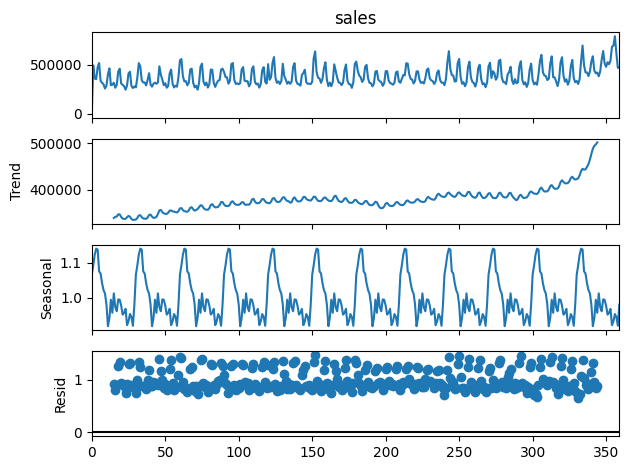

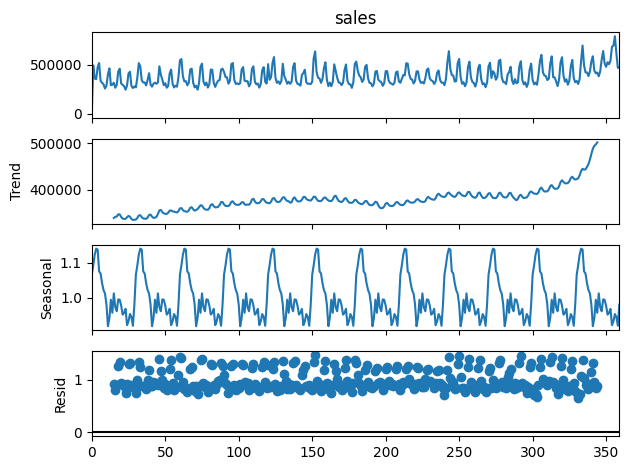

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(df_train_date.columns)
df_train_date.set_index('date')
result = seasonal_decompose(df_train_date["sales"].head(360), model='multiplicative', period=30) 
result.plot()

## Seasonal Decomposition (weekly seasonality) in a year

Index(['date', 'sales'], dtype='object')


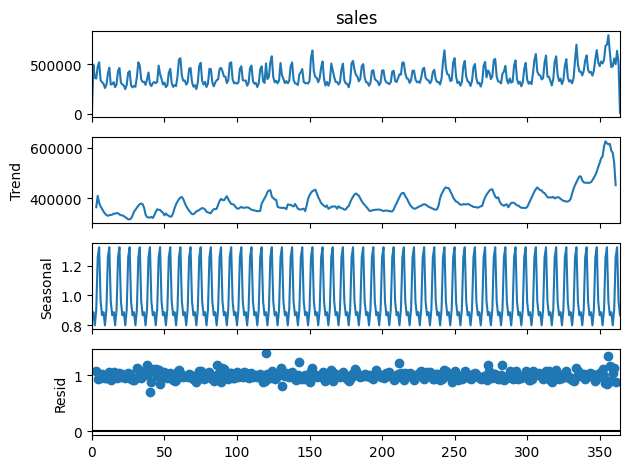

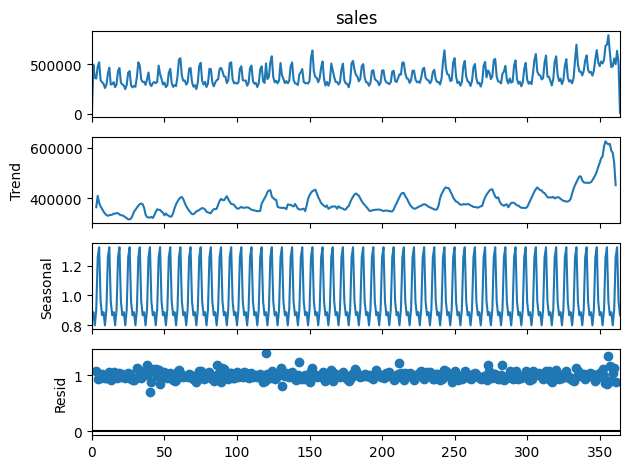

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(df_train_date.columns)
df_train_date.set_index('date')
result = seasonal_decompose(df_train_date['sales'].head(365), model='multiplicative', period=7) 
result.plot()

## Plotting the Autocorrelation Function to Understand the Seasonality 

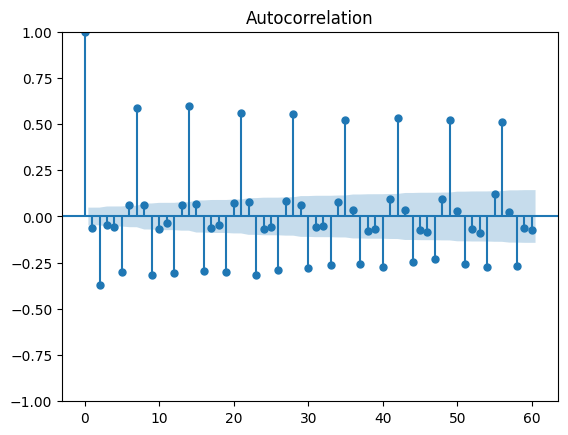

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
df_train_date['sales_diff'] = df_train_date['sales'].diff().dropna()

plot_acf(df_train_date['sales_diff'].dropna(), lags=60, use_vlines=True)
plt.show()

# Conclusion: Both Monthly and Weekly Seasonality is present.

In [16]:
df_train_date = df_train_date.drop(columns=["sales_diff"])

In [17]:
df_oil = pd.read_csv('data/oil.csv')
df_oil["date"] = pd.to_datetime(df_oil["date"])
print(df_oil.shape)
print(df_oil["date"].dtype)

(1218, 2)
datetime64[ns]


In [18]:
df_oil.head(15)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


## Plotting oil price per date - High Noise but some trends are visible

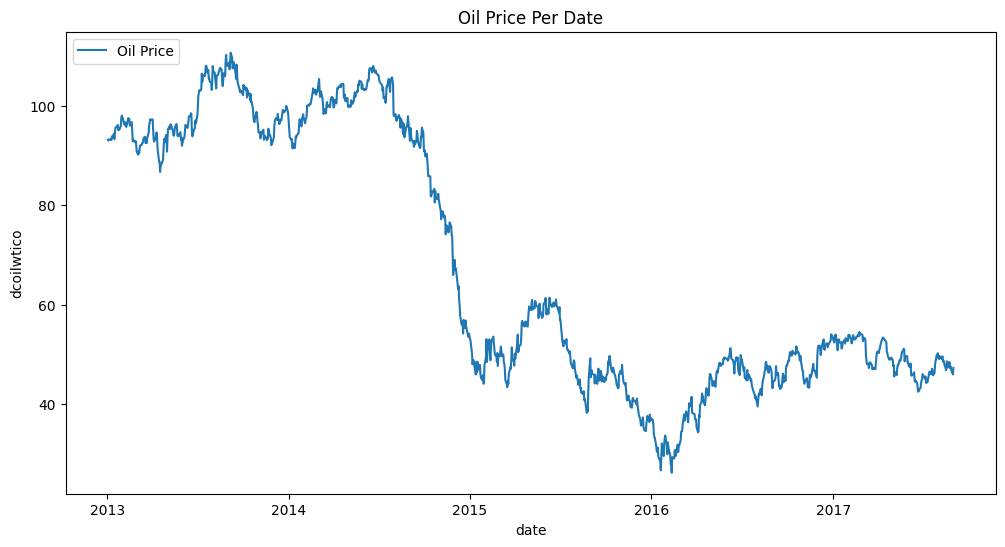

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="date", y="dcoilwtico", data=df_oil, ax=ax, dashes=True)
plt.title("Oil Price Per Date")
plt.legend(["Oil Price"], loc="upper left")
plt.show()

In [20]:
df_oil.tail(15)

,date,dcoilwtico
1203,2017-08-11,48.81
1204,2017-08-14,47.59
1205,2017-08-15,47.57
1206,2017-08-16,46.80
1207,2017-08-17,47.07
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45
1212,2017-08-24,47.24


In [21]:
df_oil_and_total_sales = pd.merge(df_train_date, df_oil, on="date", how="left").fillna(0)
df_oil_and_total_sales.head(100)

,date,sales,dcoilwtico
0,2013-01-01,2511.618999,0.00
1,2013-01-02,496092.417944,93.14
2,2013-01-03,361461.231124,92.97
3,2013-01-04,354459.677093,93.12
4,2013-01-05,477350.121229,0.00
...,...,...,...
95,2013-04-06,509424.214023,0.00
96,2013-04-07,519048.376884,0.00
97,2013-04-08,346649.815943,93.36
98,2013-04-09,306335.801962,94.18


In [22]:
print(df_oil_and_total_sales['dcoilwtico'].value_counts()[0])
print(len(df_oil_and_total_sales))

521
1684


In [23]:
oil_price_single = df_oil.loc[:, ['dcoilwtico']].groupby(by="dcoilwtico").size().reset_index(name='count')
oil_price_single["sales"] = df_oil_and_total_sales["sales"]
oil_price_single.head(15)

,dcoilwtico,count,sales
0,26.19,1,2511.618999
1,26.68,1,496092.417944
2,27.54,1,361461.231124
3,27.96,1,354459.677093
4,28.47,1,477350.121229
5,29.05,1,519695.401088
6,29.32,1,336122.801066
7,29.45,1,318347.777981
8,29.54,1,302530.809018
9,29.55,1,258982.003049


In [24]:
df_transactions = pd.read_csv('data/transactions.csv')
df_transactions["date"] = pd.to_datetime(df_transactions["date"])
df_transactions.head(25)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


## Testing the Correlation between the Number of Transactions and the Total Sales (in currency) of a store

In [25]:
df_train_store = df_train
df_train_store["date"] = pd.to_datetime(df_train_store["date"])
df_train_store = df_train_store.groupby(["store_nbr", "date"]).agg({"sales": "sum"}).reset_index()
df_train_store = df_train_store.loc[df_train_store["sales"] > 0, :]
df_train_store = df_train_store.sort_values(by=['date', 'store_nbr']).reset_index().drop(columns="index")
df_train_store.head(25)

,store_nbr,date,sales
0,25,2013-01-01,2511.618999
1,1,2013-01-02,7417.148000
2,2,2013-01-02,10266.718981
3,3,2013-01-02,24060.348000
4,4,2013-01-02,10200.083980
5,5,2013-01-02,10598.619020
6,6,2013-01-02,13520.485002
7,7,2013-01-02,11997.502000
8,8,2013-01-02,14659.328000
9,9,2013-01-02,15867.484000


In [26]:
df_merged = pd.merge(df_train_store[['date', 'store_nbr', 'sales']], df_transactions[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')
df_merged.head(15)

,date,store_nbr,sales,transactions
0,2013-01-01,25,2511.618999,770.0
1,2013-01-02,1,7417.148000,2111.0
2,2013-01-02,2,10266.718981,2358.0
3,2013-01-02,3,24060.348000,3487.0
4,2013-01-02,4,10200.083980,1922.0
5,2013-01-02,5,10598.619020,1903.0
6,2013-01-02,6,13520.485002,2143.0
7,2013-01-02,7,11997.502000,1874.0
8,2013-01-02,8,14659.328000,3250.0
9,2013-01-02,9,15867.484000,2940.0


In [27]:
temp = df_merged.drop(columns={"store_nbr", "date"})
correlation = temp.corr(method="spearman")
print(correlation.iloc[0, [1]])

transactions    0.817464
Name: sales, dtype: float64


### Conclusion: Significantly High Spearman (Nonlinear) Correlation between Number of Transactions and Total Sales (By store and Date)

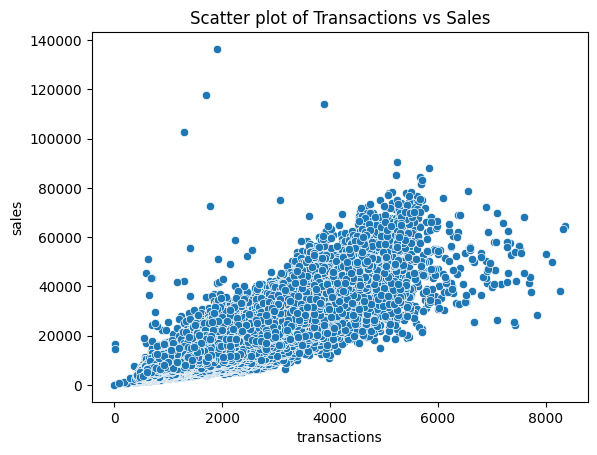

In [28]:
sns.scatterplot(x='transactions', y='sales', data=df_merged)
plt.title('Scatter plot of Transactions vs Sales')
plt.show()

In [29]:
df_stores = pd.read_csv('data/stores.csv')
df_stores.head(60)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [30]:
print(len(df_stores)) # 54 stores

54


In [31]:
a = df_train.loc[:, ["store_nbr", "sales"]]
a.head(15)

,store_nbr,sales
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
8,1,0.0
9,1,0.0


In [32]:
a["ind"] = a.groupby("store_nbr").cumcount() + 1
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales")
print(a.head(20))

store_nbr   1    2    3    4    5    6    7    8    9    10  ...   45   46  \
ind                                                          ...             
1          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
5          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
8          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
9          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
10         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
11         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...

In [33]:
a = a.corr()
print(a.corr().head(10))

store_nbr        1         2         3         4         5         6   \
store_nbr                                                               
1          1.000000  0.824473  0.944008  0.898842  0.810063  0.844210   
2          0.824473  1.000000  0.882158  0.914333  0.857473  0.905479   
3          0.944008  0.882158  1.000000  0.970986  0.846038  0.931103   
4          0.898842  0.914333  0.970986  1.000000  0.939170  0.990178   
5          0.810063  0.857473  0.846038  0.939170  1.000000  0.960194   
6          0.844210  0.905479  0.931103  0.990178  0.960194  1.000000   
7          0.970239  0.809032  0.966634  0.887868  0.730175  0.818529   
8          0.950095  0.882726  0.999380  0.971084  0.850737  0.930095   
9          0.594268  0.770207  0.685208  0.836146  0.928731  0.901945   
10         0.496299  0.678009  0.554799  0.733104  0.890137  0.813150   

store_nbr        7         8         9         10  ...        45        46  \
store_nbr                                    

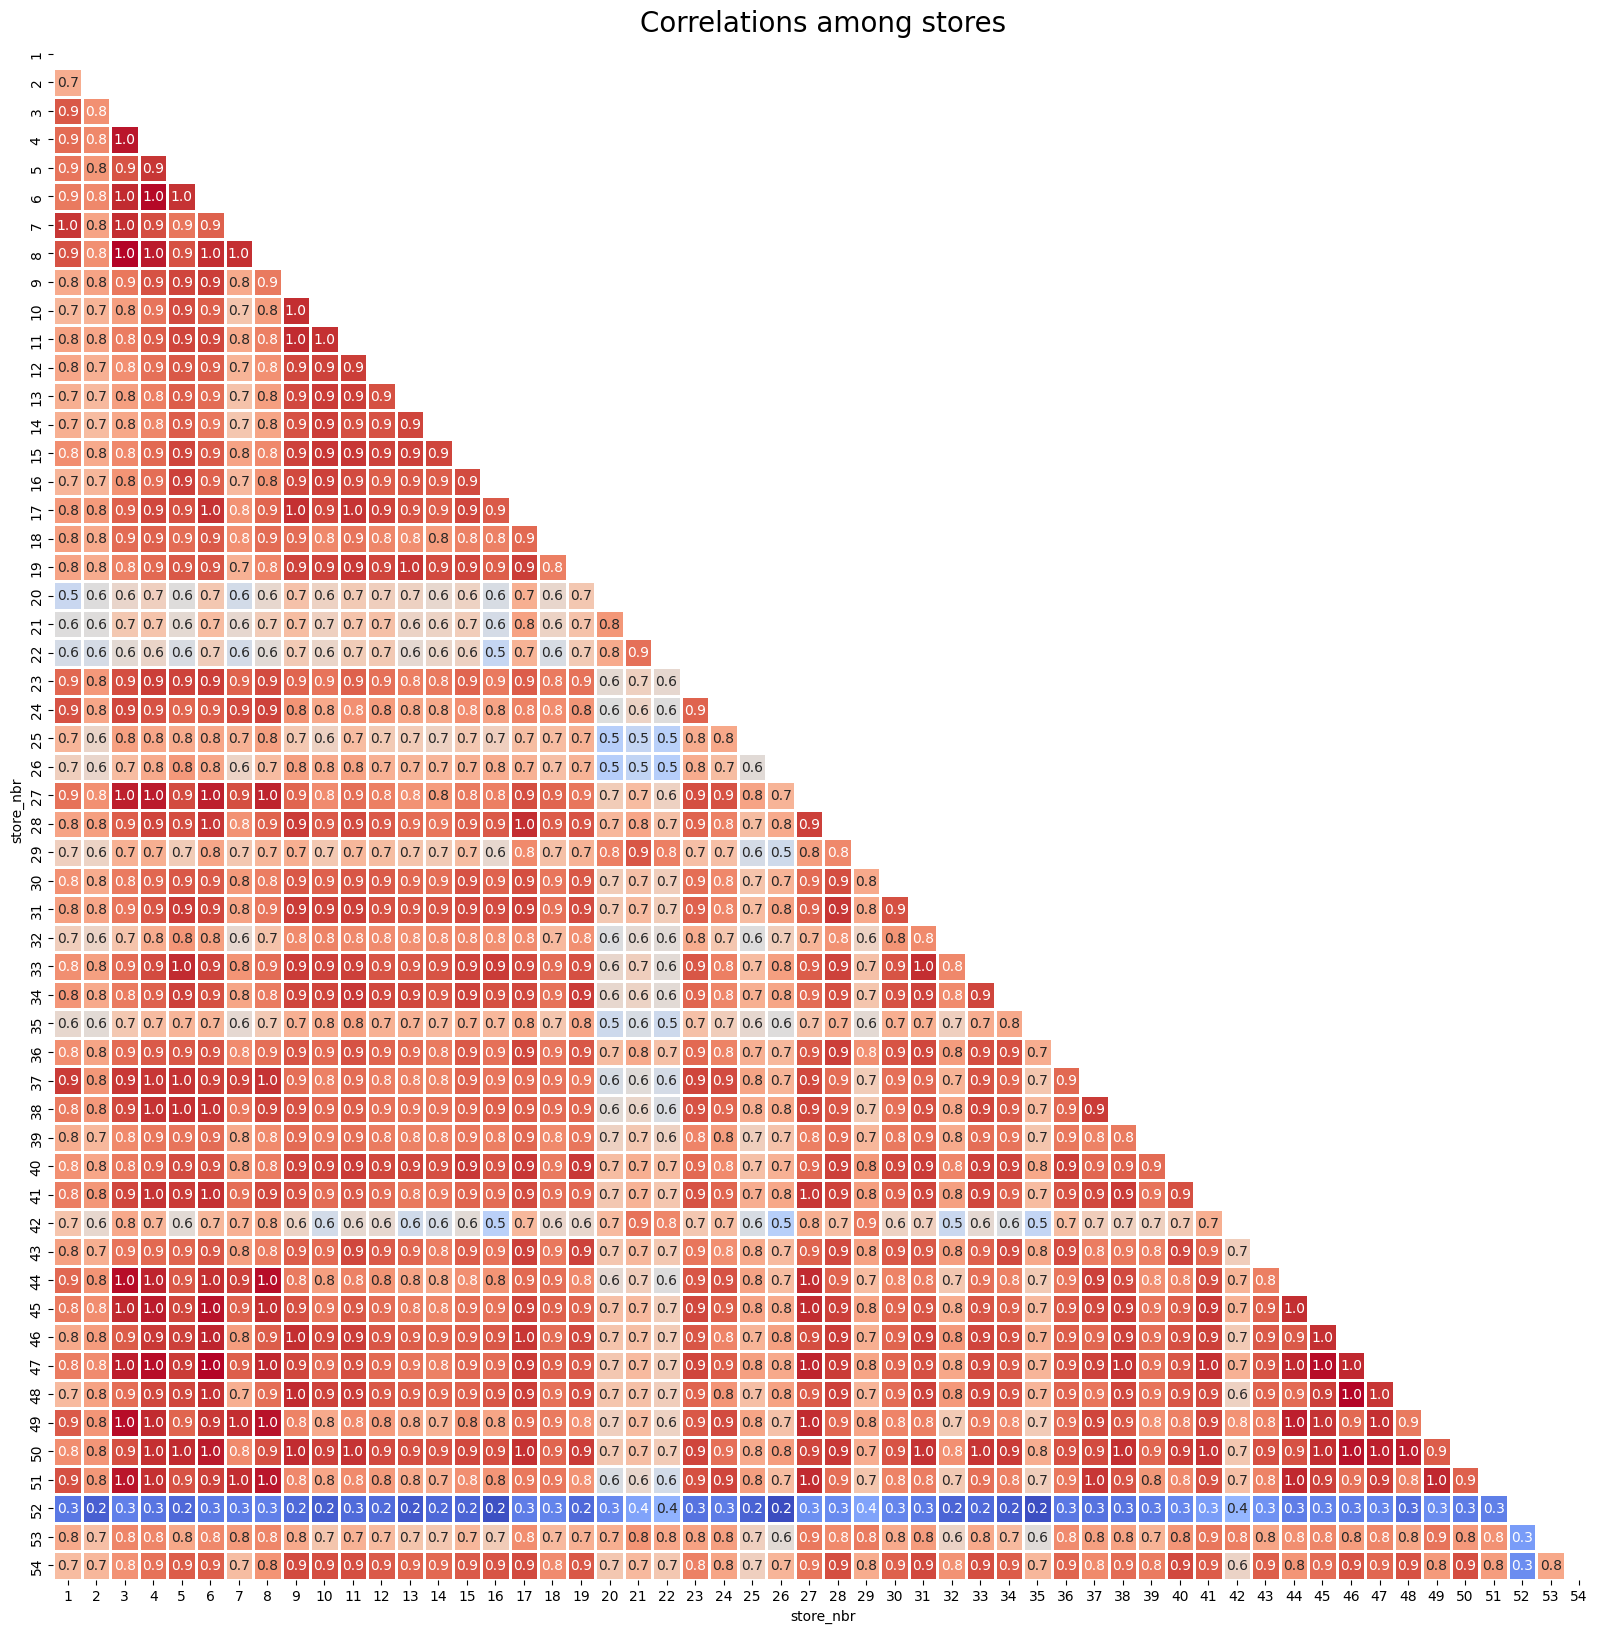

In [34]:
mask = np.triu(a)
plt.figure(figsize=(20, 20))
sns.heatmap(a, annot=True, fmt='.1f',cmap='coolwarm', square=True, mask=mask, linewidths=1, cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

## Holidays and Events Dataframe

In [35]:
df_holidays = pd.read_csv('data/holidays_events.csv')
df_holidays["date"] = pd.to_datetime(df_holidays["date"]) # The length of the dataframe is 350.

In [36]:
## Removing the transferred holidays.

df_holidays = df_holidays.loc[df_holidays["transferred"] != True, :]
df_holidays = df_holidays.drop(columns=["transferred"])
df_holidays.head(25)

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala


In [37]:
print(df_holidays["type"].unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [38]:
print(df_train.shape)
df_train = df_train[~((df_train.store_nbr == 52) & (df_train.date < "2017-04-20"))]
df_train = df_train[~((df_train.store_nbr == 22) & (df_train.date < "2015-10-09"))]
df_train = df_train[~((df_train.store_nbr == 42) & (df_train.date < "2015-08-21"))]
df_train = df_train[~((df_train.store_nbr == 21) & (df_train.date < "2015-07-24"))]
df_train = df_train[~((df_train.store_nbr == 29) & (df_train.date < "2015-03-20"))]
df_train = df_train[~((df_train.store_nbr == 20) & (df_train.date < "2015-02-13"))]
df_train = df_train[~((df_train.store_nbr == 53) & (df_train.date < "2014-05-29"))]
df_train = df_train[~((df_train.store_nbr == 36) & (df_train.date < "2013-05-09"))]
df_train.shape

(3000888, 6)


(2780316, 6)

In [39]:
c = df_train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family", "store_nbr"])
print(c.head(20))

     store_nbr      family    sales
0            1  AUTOMOTIVE   5475.0
33           2  AUTOMOTIVE   9100.0
66           3  AUTOMOTIVE  15647.0
99           4  AUTOMOTIVE   6767.0
132          5  AUTOMOTIVE   9194.0
165          6  AUTOMOTIVE   9028.0
198          7  AUTOMOTIVE   7150.0
231          8  AUTOMOTIVE   8890.0
264          9  AUTOMOTIVE  23358.0
297         10  AUTOMOTIVE   5192.0
330         11  AUTOMOTIVE  11266.0
363         12  AUTOMOTIVE   8004.0
396         13  AUTOMOTIVE   9303.0
429         14  AUTOMOTIVE   6093.0
462         15  AUTOMOTIVE   4520.0
495         16  AUTOMOTIVE   9688.0
528         17  AUTOMOTIVE  10287.0
561         18  AUTOMOTIVE   6412.0
594         19  AUTOMOTIVE  11027.0
627         20  AUTOMOTIVE   7576.0


In [40]:
c = c.loc[(c["sales"] == 0), :]
print(c.head(20))

      store_nbr     family  sales
1             1  BABY CARE    0.0
397          13  BABY CARE    0.0
727          23  BABY CARE    0.0
1420         44  BABY CARE    0.0
1453         45  BABY CARE    0.0
1486         46  BABY CARE    0.0
1519         47  BABY CARE    0.0
1552         48  BABY CARE    0.0
1585         49  BABY CARE    0.0
1618         50  BABY CARE    0.0
1651         51  BABY CARE    0.0
1684         52  BABY CARE    0.0
268           9      BOOKS    0.0
301          10      BOOKS    0.0
334          11      BOOKS    0.0
367          12      BOOKS    0.0
400          13      BOOKS    0.0
433          14      BOOKS    0.0
466          15      BOOKS    0.0
499          16      BOOKS    0.0


In [41]:
print(df_train.shape)
# Anti Join
outer_join = df_train.merge(c[c.sales == 0].drop("sales",axis = 1), how = 'outer', indicator = True)
df_train = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
del outer_join
df_train.shape

(2780316, 6)


(2698648, 6)

In [42]:
df_train.head(20)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
2,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
3,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
4,7128,2013-01-05,1,AUTOMOTIVE,5.0,0
5,8910,2013-01-06,1,AUTOMOTIVE,2.0,0
6,10692,2013-01-07,1,AUTOMOTIVE,0.0,0
7,12474,2013-01-08,1,AUTOMOTIVE,2.0,0
8,14256,2013-01-09,1,AUTOMOTIVE,2.0,0
9,16038,2013-01-10,1,AUTOMOTIVE,2.0,0


In [65]:
df_train = pd.merge(df_train, df_stores[['store_nbr', 'city', 'state']], on='store_nbr', how='left')
df_train['country'] = 'Ecuador'
df_train.head(15)
df_train = df_train.drop(columns=["city_y", "state_y"])
df_train = df_train.rename(columns={"city_x": "city", "state_x": "state"})
df_train.head(15)

,id,ds,store_nbr,family,y,city,state,country,city,state
0,0,2013-01-01,1,AUTOMOTIVE,0.0,Quito,Pichincha,Ecuador,Quito,Pichincha
1,1782,2013-01-02,1,AUTOMOTIVE,2.0,Quito,Pichincha,Ecuador,Quito,Pichincha
2,3564,2013-01-03,1,AUTOMOTIVE,3.0,Quito,Pichincha,Ecuador,Quito,Pichincha
3,5346,2013-01-04,1,AUTOMOTIVE,3.0,Quito,Pichincha,Ecuador,Quito,Pichincha
4,7128,2013-01-05,1,AUTOMOTIVE,5.0,Quito,Pichincha,Ecuador,Quito,Pichincha
5,8910,2013-01-06,1,AUTOMOTIVE,2.0,Quito,Pichincha,Ecuador,Quito,Pichincha
6,10692,2013-01-07,1,AUTOMOTIVE,0.0,Quito,Pichincha,Ecuador,Quito,Pichincha
7,12474,2013-01-08,1,AUTOMOTIVE,2.0,Quito,Pichincha,Ecuador,Quito,Pichincha
8,14256,2013-01-09,1,AUTOMOTIVE,2.0,Quito,Pichincha,Ecuador,Quito,Pichincha
9,16038,2013-01-10,1,AUTOMOTIVE,2.0,Quito,Pichincha,Ecuador,Quito,Pichincha


In [79]:
df_test = pd.read_csv('./data/test.csv')
df_test["date"] = pd.to_datetime(df_test["date"])
df_test = pd.merge(df_test, df_stores[['store_nbr', 'city', 'state']], on='store_nbr', how='left')
df_test['country'] = 'Ecuador'
df_test = df_test.drop(columns=["onpromotion"])
df_test.head(15)

,id,date,store_nbr,family,city,state,country
0,3000888,2017-08-16,1,AUTOMOTIVE,Quito,Pichincha,Ecuador
1,3000889,2017-08-16,1,BABY CARE,Quito,Pichincha,Ecuador
2,3000890,2017-08-16,1,BEAUTY,Quito,Pichincha,Ecuador
3,3000891,2017-08-16,1,BEVERAGES,Quito,Pichincha,Ecuador
4,3000892,2017-08-16,1,BOOKS,Quito,Pichincha,Ecuador
5,3000893,2017-08-16,1,BREAD/BAKERY,Quito,Pichincha,Ecuador
6,3000894,2017-08-16,1,CELEBRATION,Quito,Pichincha,Ecuador
7,3000895,2017-08-16,1,CLEANING,Quito,Pichincha,Ecuador
8,3000896,2017-08-16,1,DAIRY,Quito,Pichincha,Ecuador
9,3000897,2017-08-16,1,DELI,Quito,Pichincha,Ecuador


In [58]:
df_train = df_train.rename(columns={"date":"ds", "sales": "y"})

### Method: The data is gonna be passed into Prophet by grouping the product families and the store locations - looping over each product family in a the store. e.g. automotive family in store 1 from 2013 to 2017

In [66]:
from prophet import Prophet

def build_prophet_model(train_data, holidays_df):      
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, holidays=holidays_df, seasonality_mode='multiplicative', changepoint_prior_scale=0.05, holidays_prior_scale=10.0)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    model.fit(train_data)
    return model

In [77]:
from collections import defaultdict

def train_prophet_model():
    models = defaultdict(dict)

    store_family_pairs = df_train.groupby(['store_nbr', 'family']).size().reset_index(name='count')
    print(store_family_pairs.head(20))

    for _, row in store_family_pairs.iterrows():
        store = row['store_nbr']
        family = row['family']
        
        # Filter data for the current (store, family) pair
        temp_df = df_train[(df_train['store_nbr'] == store) & (df_train['family'] == family)]
        
        # Prepare data for Prophet
        prophet_df = temp_df[['ds', 'y']]
        
        # Extract city, state, country info (take first row, they should all match)
        city = str(temp_df.iloc[0]['city'])
        state = str(temp_df.iloc[0]['state'])
        country = str(temp_df.iloc[0]['country'])
        
        # Filter holidays matching city, state, or country
        holidays_filtered = df_holidays[(df_holidays['locale_name'] == city) | (df_holidays['locale_name'] == state) | (df_holidays['locale_name'] == country)]

        # Prepare holidays in Prophet format
        holidays_prophet = holidays_filtered[['date', 'description']].rename(columns={'date': 'ds', 'description': 'holiday'})
        holidays_prophet['lower_window'] = 0
        holidays_prophet['upper_window'] = 0
        
        # Build & train model
        model = build_prophet_model(prophet_df, holidays_prophet)
        models[store][family] = model
        print(f"Training Store: {store}, Family: {family}, Data points: {len(temp_df)}")
        
    return models



In [78]:
models = train_prophet_model()

    store_nbr               family  count
0           1           AUTOMOTIVE   1684
1           1               BEAUTY   1684
2           1            BEVERAGES   1684
3           1                BOOKS   1684
4           1         BREAD/BAKERY   1684
5           1          CELEBRATION   1684
6           1             CLEANING   1684
7           1                DAIRY   1684
8           1                 DELI   1684
9           1                 EGGS   1684
10          1         FROZEN FOODS   1684
11          1            GROCERY I   1684
12          1           GROCERY II   1684
13          1             HARDWARE   1684
14          1   HOME AND KITCHEN I   1684
15          1  HOME AND KITCHEN II   1684
16          1      HOME APPLIANCES   1684
17          1            HOME CARE   1684
18          1           LADIESWEAR   1684
19          1      LAWN AND GARDEN   1684


12:34:47 - cmdstanpy - INFO - Chain [1] start processing
12:34:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: AUTOMOTIVE, Data points: 1684


12:34:48 - cmdstanpy - INFO - Chain [1] start processing
12:34:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: BEAUTY, Data points: 1684


12:34:48 - cmdstanpy - INFO - Chain [1] start processing
12:34:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: BEVERAGES, Data points: 1684


12:34:48 - cmdstanpy - INFO - Chain [1] start processing
12:34:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: BOOKS, Data points: 1684


12:34:49 - cmdstanpy - INFO - Chain [1] start processing
12:34:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: BREAD/BAKERY, Data points: 1684


12:34:49 - cmdstanpy - INFO - Chain [1] start processing
12:34:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: CELEBRATION, Data points: 1684


12:34:50 - cmdstanpy - INFO - Chain [1] start processing
12:34:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: CLEANING, Data points: 1684


12:34:50 - cmdstanpy - INFO - Chain [1] start processing
12:34:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: DAIRY, Data points: 1684


12:34:51 - cmdstanpy - INFO - Chain [1] start processing
12:34:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: DELI, Data points: 1684


12:34:51 - cmdstanpy - INFO - Chain [1] start processing
12:34:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: EGGS, Data points: 1684


12:34:51 - cmdstanpy - INFO - Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: FROZEN FOODS, Data points: 1684


12:34:52 - cmdstanpy - INFO - Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: GROCERY I, Data points: 1684


12:34:52 - cmdstanpy - INFO - Chain [1] start processing
12:34:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: GROCERY II, Data points: 1684


12:34:53 - cmdstanpy - INFO - Chain [1] start processing
12:34:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: HARDWARE, Data points: 1684


12:34:53 - cmdstanpy - INFO - Chain [1] start processing
12:34:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: HOME AND KITCHEN I, Data points: 1684


12:34:53 - cmdstanpy - INFO - Chain [1] start processing
12:34:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: HOME AND KITCHEN II, Data points: 1684


12:34:54 - cmdstanpy - INFO - Chain [1] start processing
12:34:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: HOME APPLIANCES, Data points: 1684


12:34:54 - cmdstanpy - INFO - Chain [1] start processing
12:34:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: HOME CARE, Data points: 1684


12:34:55 - cmdstanpy - INFO - Chain [1] start processing
12:34:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: LADIESWEAR, Data points: 1684


12:34:55 - cmdstanpy - INFO - Chain [1] start processing
12:34:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: LAWN AND GARDEN, Data points: 1684


12:34:56 - cmdstanpy - INFO - Chain [1] start processing
12:34:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: LINGERIE, Data points: 1684


12:34:56 - cmdstanpy - INFO - Chain [1] start processing
12:34:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: LIQUOR,WINE,BEER, Data points: 1684


12:34:56 - cmdstanpy - INFO - Chain [1] start processing
12:34:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: MAGAZINES, Data points: 1684


12:34:57 - cmdstanpy - INFO - Chain [1] start processing
12:34:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: MEATS, Data points: 1684


12:34:57 - cmdstanpy - INFO - Chain [1] start processing
12:34:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: PERSONAL CARE, Data points: 1684


12:34:58 - cmdstanpy - INFO - Chain [1] start processing
12:34:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: PET SUPPLIES, Data points: 1684


12:34:58 - cmdstanpy - INFO - Chain [1] start processing
12:34:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:34:58 - cmdstanpy - INFO - Chain [1] start processing
12:34:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: POULTRY, Data points: 1684


12:34:59 - cmdstanpy - INFO - Chain [1] start processing
12:34:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: PREPARED FOODS, Data points: 1684


12:34:59 - cmdstanpy - INFO - Chain [1] start processing
12:34:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: PRODUCE, Data points: 1684


12:35:00 - cmdstanpy - INFO - Chain [1] start processing
12:35:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:35:00 - cmdstanpy - INFO - Chain [1] start processing
12:35:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 1, Family: SEAFOOD, Data points: 1684


12:35:00 - cmdstanpy - INFO - Chain [1] start processing
12:35:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: AUTOMOTIVE, Data points: 1684


12:35:01 - cmdstanpy - INFO - Chain [1] start processing
12:35:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: BABY CARE, Data points: 1684


12:35:01 - cmdstanpy - INFO - Chain [1] start processing
12:35:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: BEAUTY, Data points: 1684


12:35:01 - cmdstanpy - INFO - Chain [1] start processing
12:35:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: BEVERAGES, Data points: 1684


12:35:02 - cmdstanpy - INFO - Chain [1] start processing
12:35:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: BOOKS, Data points: 1684


12:35:02 - cmdstanpy - INFO - Chain [1] start processing
12:35:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: BREAD/BAKERY, Data points: 1684


12:35:03 - cmdstanpy - INFO - Chain [1] start processing
12:35:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: CELEBRATION, Data points: 1684


12:35:03 - cmdstanpy - INFO - Chain [1] start processing
12:35:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: CLEANING, Data points: 1684


12:35:03 - cmdstanpy - INFO - Chain [1] start processing
12:35:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: DAIRY, Data points: 1684


12:35:04 - cmdstanpy - INFO - Chain [1] start processing
12:35:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: DELI, Data points: 1684


12:35:04 - cmdstanpy - INFO - Chain [1] start processing
12:35:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: EGGS, Data points: 1684


12:35:05 - cmdstanpy - INFO - Chain [1] start processing
12:35:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: FROZEN FOODS, Data points: 1684


12:35:05 - cmdstanpy - INFO - Chain [1] start processing
12:35:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: GROCERY I, Data points: 1684


12:35:08 - cmdstanpy - INFO - Chain [1] start processing
12:35:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: GROCERY II, Data points: 1684


12:35:08 - cmdstanpy - INFO - Chain [1] start processing
12:35:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: HARDWARE, Data points: 1684


12:35:09 - cmdstanpy - INFO - Chain [1] start processing
12:35:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: HOME AND KITCHEN I, Data points: 1684


12:35:09 - cmdstanpy - INFO - Chain [1] start processing
12:35:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: HOME AND KITCHEN II, Data points: 1684


12:35:09 - cmdstanpy - INFO - Chain [1] start processing
12:35:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: HOME APPLIANCES, Data points: 1684


12:35:10 - cmdstanpy - INFO - Chain [1] start processing
12:35:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: HOME CARE, Data points: 1684


12:35:10 - cmdstanpy - INFO - Chain [1] start processing
12:35:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: LADIESWEAR, Data points: 1684


12:35:11 - cmdstanpy - INFO - Chain [1] start processing
12:35:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: LAWN AND GARDEN, Data points: 1684


12:35:11 - cmdstanpy - INFO - Chain [1] start processing
12:35:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: LINGERIE, Data points: 1684


12:35:11 - cmdstanpy - INFO - Chain [1] start processing
12:35:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: LIQUOR,WINE,BEER, Data points: 1684


12:35:12 - cmdstanpy - INFO - Chain [1] start processing
12:35:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: MAGAZINES, Data points: 1684


12:35:12 - cmdstanpy - INFO - Chain [1] start processing
12:35:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: MEATS, Data points: 1684


12:35:13 - cmdstanpy - INFO - Chain [1] start processing
12:35:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: PERSONAL CARE, Data points: 1684


12:35:14 - cmdstanpy - INFO - Chain [1] start processing
12:35:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: PET SUPPLIES, Data points: 1684


12:35:14 - cmdstanpy - INFO - Chain [1] start processing
12:35:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:35:15 - cmdstanpy - INFO - Chain [1] start processing
12:35:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: POULTRY, Data points: 1684


12:35:15 - cmdstanpy - INFO - Chain [1] start processing
12:35:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: PREPARED FOODS, Data points: 1684


12:35:15 - cmdstanpy - INFO - Chain [1] start processing
12:35:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: PRODUCE, Data points: 1684


12:35:16 - cmdstanpy - INFO - Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:35:16 - cmdstanpy - INFO - Chain [1] start processing
12:35:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 2, Family: SEAFOOD, Data points: 1684


12:35:16 - cmdstanpy - INFO - Chain [1] start processing
12:35:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: AUTOMOTIVE, Data points: 1684


12:35:17 - cmdstanpy - INFO - Chain [1] start processing
12:35:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: BABY CARE, Data points: 1684


12:35:17 - cmdstanpy - INFO - Chain [1] start processing
12:35:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: BEAUTY, Data points: 1684


12:35:18 - cmdstanpy - INFO - Chain [1] start processing
12:35:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: BEVERAGES, Data points: 1684


12:35:18 - cmdstanpy - INFO - Chain [1] start processing
12:35:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: BOOKS, Data points: 1684


12:35:18 - cmdstanpy - INFO - Chain [1] start processing
12:35:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: BREAD/BAKERY, Data points: 1684


12:35:19 - cmdstanpy - INFO - Chain [1] start processing
12:35:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: CELEBRATION, Data points: 1684


12:35:19 - cmdstanpy - INFO - Chain [1] start processing
12:35:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: CLEANING, Data points: 1684


12:35:19 - cmdstanpy - INFO - Chain [1] start processing
12:35:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: DAIRY, Data points: 1684


12:35:20 - cmdstanpy - INFO - Chain [1] start processing
12:35:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: DELI, Data points: 1684


12:35:20 - cmdstanpy - INFO - Chain [1] start processing
12:35:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: EGGS, Data points: 1684


12:35:20 - cmdstanpy - INFO - Chain [1] start processing
12:35:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: FROZEN FOODS, Data points: 1684


12:35:21 - cmdstanpy - INFO - Chain [1] start processing
12:35:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: GROCERY I, Data points: 1684


12:35:21 - cmdstanpy - INFO - Chain [1] start processing
12:35:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: GROCERY II, Data points: 1684


12:35:22 - cmdstanpy - INFO - Chain [1] start processing
12:35:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: HARDWARE, Data points: 1684


12:35:22 - cmdstanpy - INFO - Chain [1] start processing
12:35:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: HOME AND KITCHEN I, Data points: 1684


12:35:22 - cmdstanpy - INFO - Chain [1] start processing
12:35:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: HOME AND KITCHEN II, Data points: 1684


12:35:23 - cmdstanpy - INFO - Chain [1] start processing
12:35:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: HOME APPLIANCES, Data points: 1684


12:35:23 - cmdstanpy - INFO - Chain [1] start processing
12:35:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: HOME CARE, Data points: 1684


12:35:24 - cmdstanpy - INFO - Chain [1] start processing
12:35:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: LADIESWEAR, Data points: 1684


12:35:24 - cmdstanpy - INFO - Chain [1] start processing
12:35:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: LAWN AND GARDEN, Data points: 1684


12:35:24 - cmdstanpy - INFO - Chain [1] start processing
12:35:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: LINGERIE, Data points: 1684


12:35:25 - cmdstanpy - INFO - Chain [1] start processing
12:35:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: LIQUOR,WINE,BEER, Data points: 1684


12:35:25 - cmdstanpy - INFO - Chain [1] start processing
12:35:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: MAGAZINES, Data points: 1684


12:35:26 - cmdstanpy - INFO - Chain [1] start processing
12:35:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: MEATS, Data points: 1684


12:35:26 - cmdstanpy - INFO - Chain [1] start processing
12:35:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: PERSONAL CARE, Data points: 1684


12:35:26 - cmdstanpy - INFO - Chain [1] start processing
12:35:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: PET SUPPLIES, Data points: 1684


12:35:27 - cmdstanpy - INFO - Chain [1] start processing
12:35:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:35:27 - cmdstanpy - INFO - Chain [1] start processing
12:35:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: POULTRY, Data points: 1684


12:35:28 - cmdstanpy - INFO - Chain [1] start processing
12:35:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: PREPARED FOODS, Data points: 1684


12:35:28 - cmdstanpy - INFO - Chain [1] start processing
12:35:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: PRODUCE, Data points: 1684


12:35:28 - cmdstanpy - INFO - Chain [1] start processing
12:35:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:35:29 - cmdstanpy - INFO - Chain [1] start processing
12:35:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 3, Family: SEAFOOD, Data points: 1684


12:35:29 - cmdstanpy - INFO - Chain [1] start processing
12:35:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: AUTOMOTIVE, Data points: 1684


12:35:29 - cmdstanpy - INFO - Chain [1] start processing
12:35:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: BABY CARE, Data points: 1684


12:35:30 - cmdstanpy - INFO - Chain [1] start processing
12:35:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: BEAUTY, Data points: 1684


12:35:30 - cmdstanpy - INFO - Chain [1] start processing
12:35:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: BEVERAGES, Data points: 1684


12:35:31 - cmdstanpy - INFO - Chain [1] start processing
12:35:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: BOOKS, Data points: 1684


12:35:31 - cmdstanpy - INFO - Chain [1] start processing
12:35:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: BREAD/BAKERY, Data points: 1684


12:35:32 - cmdstanpy - INFO - Chain [1] start processing
12:35:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: CELEBRATION, Data points: 1684


12:35:32 - cmdstanpy - INFO - Chain [1] start processing
12:35:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: CLEANING, Data points: 1684


12:35:32 - cmdstanpy - INFO - Chain [1] start processing
12:35:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: DAIRY, Data points: 1684


12:35:33 - cmdstanpy - INFO - Chain [1] start processing
12:35:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: DELI, Data points: 1684


12:35:33 - cmdstanpy - INFO - Chain [1] start processing
12:35:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: EGGS, Data points: 1684


12:35:33 - cmdstanpy - INFO - Chain [1] start processing
12:35:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: FROZEN FOODS, Data points: 1684


12:35:34 - cmdstanpy - INFO - Chain [1] start processing
12:35:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: GROCERY I, Data points: 1684


12:35:34 - cmdstanpy - INFO - Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: GROCERY II, Data points: 1684


12:35:35 - cmdstanpy - INFO - Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: HARDWARE, Data points: 1684


12:35:35 - cmdstanpy - INFO - Chain [1] start processing
12:35:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: HOME AND KITCHEN I, Data points: 1684


12:35:35 - cmdstanpy - INFO - Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: HOME AND KITCHEN II, Data points: 1684


12:35:36 - cmdstanpy - INFO - Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: HOME APPLIANCES, Data points: 1684


12:35:36 - cmdstanpy - INFO - Chain [1] start processing
12:35:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: HOME CARE, Data points: 1684


12:35:37 - cmdstanpy - INFO - Chain [1] start processing
12:35:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: LADIESWEAR, Data points: 1684


12:35:37 - cmdstanpy - INFO - Chain [1] start processing
12:35:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: LAWN AND GARDEN, Data points: 1684


12:35:38 - cmdstanpy - INFO - Chain [1] start processing
12:35:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: LINGERIE, Data points: 1684


12:35:38 - cmdstanpy - INFO - Chain [1] start processing
12:35:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: LIQUOR,WINE,BEER, Data points: 1684


12:35:39 - cmdstanpy - INFO - Chain [1] start processing
12:35:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: MAGAZINES, Data points: 1684


12:35:39 - cmdstanpy - INFO - Chain [1] start processing
12:35:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: MEATS, Data points: 1684


12:35:39 - cmdstanpy - INFO - Chain [1] start processing
12:35:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: PERSONAL CARE, Data points: 1684


12:35:40 - cmdstanpy - INFO - Chain [1] start processing
12:35:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: PET SUPPLIES, Data points: 1684


12:35:40 - cmdstanpy - INFO - Chain [1] start processing
12:35:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:35:40 - cmdstanpy - INFO - Chain [1] start processing
12:35:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: POULTRY, Data points: 1684


12:35:41 - cmdstanpy - INFO - Chain [1] start processing
12:35:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: PREPARED FOODS, Data points: 1684


12:35:41 - cmdstanpy - INFO - Chain [1] start processing
12:35:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: PRODUCE, Data points: 1684


12:35:41 - cmdstanpy - INFO - Chain [1] start processing
12:35:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:35:42 - cmdstanpy - INFO - Chain [1] start processing
12:35:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 4, Family: SEAFOOD, Data points: 1684


12:35:42 - cmdstanpy - INFO - Chain [1] start processing
12:35:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: AUTOMOTIVE, Data points: 1684


12:35:43 - cmdstanpy - INFO - Chain [1] start processing
12:35:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: BABY CARE, Data points: 1684


12:35:43 - cmdstanpy - INFO - Chain [1] start processing
12:35:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: BEAUTY, Data points: 1684


12:35:43 - cmdstanpy - INFO - Chain [1] start processing
12:35:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: BEVERAGES, Data points: 1684


12:35:44 - cmdstanpy - INFO - Chain [1] start processing
12:35:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: BOOKS, Data points: 1684


12:35:44 - cmdstanpy - INFO - Chain [1] start processing
12:35:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: BREAD/BAKERY, Data points: 1684


12:35:44 - cmdstanpy - INFO - Chain [1] start processing
12:35:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: CELEBRATION, Data points: 1684


12:35:45 - cmdstanpy - INFO - Chain [1] start processing
12:35:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: CLEANING, Data points: 1684


12:35:45 - cmdstanpy - INFO - Chain [1] start processing
12:35:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: DAIRY, Data points: 1684


12:35:46 - cmdstanpy - INFO - Chain [1] start processing
12:35:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: DELI, Data points: 1684


12:35:46 - cmdstanpy - INFO - Chain [1] start processing
12:35:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: EGGS, Data points: 1684


12:35:46 - cmdstanpy - INFO - Chain [1] start processing
12:35:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: FROZEN FOODS, Data points: 1684


12:35:47 - cmdstanpy - INFO - Chain [1] start processing
12:35:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: GROCERY I, Data points: 1684


12:35:47 - cmdstanpy - INFO - Chain [1] start processing
12:35:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: GROCERY II, Data points: 1684


12:35:48 - cmdstanpy - INFO - Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: HARDWARE, Data points: 1684


12:35:48 - cmdstanpy - INFO - Chain [1] start processing
12:35:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: HOME AND KITCHEN I, Data points: 1684


12:35:48 - cmdstanpy - INFO - Chain [1] start processing
12:35:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: HOME AND KITCHEN II, Data points: 1684


12:35:49 - cmdstanpy - INFO - Chain [1] start processing
12:35:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: HOME APPLIANCES, Data points: 1684


12:35:49 - cmdstanpy - INFO - Chain [1] start processing
12:35:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: HOME CARE, Data points: 1684


12:35:49 - cmdstanpy - INFO - Chain [1] start processing
12:35:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: LADIESWEAR, Data points: 1684


12:35:50 - cmdstanpy - INFO - Chain [1] start processing
12:35:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: LAWN AND GARDEN, Data points: 1684


12:35:51 - cmdstanpy - INFO - Chain [1] start processing
12:35:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: LINGERIE, Data points: 1684


12:35:51 - cmdstanpy - INFO - Chain [1] start processing
12:35:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: LIQUOR,WINE,BEER, Data points: 1684


12:35:51 - cmdstanpy - INFO - Chain [1] start processing
12:35:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: MAGAZINES, Data points: 1684


12:35:52 - cmdstanpy - INFO - Chain [1] start processing
12:35:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: MEATS, Data points: 1684


12:35:52 - cmdstanpy - INFO - Chain [1] start processing
12:35:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: PERSONAL CARE, Data points: 1684


12:35:52 - cmdstanpy - INFO - Chain [1] start processing
12:35:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: PET SUPPLIES, Data points: 1684


12:35:53 - cmdstanpy - INFO - Chain [1] start processing
12:35:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:35:53 - cmdstanpy - INFO - Chain [1] start processing
12:35:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: POULTRY, Data points: 1684


12:35:53 - cmdstanpy - INFO - Chain [1] start processing
12:35:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: PREPARED FOODS, Data points: 1684


12:35:54 - cmdstanpy - INFO - Chain [1] start processing
12:35:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: PRODUCE, Data points: 1684


12:35:54 - cmdstanpy - INFO - Chain [1] start processing
12:35:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:35:55 - cmdstanpy - INFO - Chain [1] start processing
12:35:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 5, Family: SEAFOOD, Data points: 1684


12:35:55 - cmdstanpy - INFO - Chain [1] start processing
12:35:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: AUTOMOTIVE, Data points: 1684


12:35:55 - cmdstanpy - INFO - Chain [1] start processing
12:35:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: BABY CARE, Data points: 1684


12:35:56 - cmdstanpy - INFO - Chain [1] start processing
12:35:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: BEAUTY, Data points: 1684


12:35:56 - cmdstanpy - INFO - Chain [1] start processing
12:35:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: BEVERAGES, Data points: 1684


12:35:57 - cmdstanpy - INFO - Chain [1] start processing
12:35:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: BOOKS, Data points: 1684


12:35:58 - cmdstanpy - INFO - Chain [1] start processing
12:35:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: BREAD/BAKERY, Data points: 1684


12:35:58 - cmdstanpy - INFO - Chain [1] start processing
12:35:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: CELEBRATION, Data points: 1684


12:35:58 - cmdstanpy - INFO - Chain [1] start processing
12:35:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: CLEANING, Data points: 1684


12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:35:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: DAIRY, Data points: 1684


12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:35:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: DELI, Data points: 1684


12:35:59 - cmdstanpy - INFO - Chain [1] start processing
12:36:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: EGGS, Data points: 1684


12:36:00 - cmdstanpy - INFO - Chain [1] start processing
12:36:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: FROZEN FOODS, Data points: 1684


12:36:00 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: GROCERY I, Data points: 1684


12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: GROCERY II, Data points: 1684


12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: HARDWARE, Data points: 1684


12:36:02 - cmdstanpy - INFO - Chain [1] start processing
12:36:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: HOME AND KITCHEN I, Data points: 1684


12:36:02 - cmdstanpy - INFO - Chain [1] start processing
12:36:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: HOME AND KITCHEN II, Data points: 1684


12:36:03 - cmdstanpy - INFO - Chain [1] start processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: HOME APPLIANCES, Data points: 1684


12:36:03 - cmdstanpy - INFO - Chain [1] start processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: HOME CARE, Data points: 1684


12:36:03 - cmdstanpy - INFO - Chain [1] start processing
12:36:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: LADIESWEAR, Data points: 1684


12:36:04 - cmdstanpy - INFO - Chain [1] start processing
12:36:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: LAWN AND GARDEN, Data points: 1684


12:36:04 - cmdstanpy - INFO - Chain [1] start processing
12:36:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: LINGERIE, Data points: 1684


12:36:05 - cmdstanpy - INFO - Chain [1] start processing
12:36:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: LIQUOR,WINE,BEER, Data points: 1684


12:36:05 - cmdstanpy - INFO - Chain [1] start processing
12:36:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: MAGAZINES, Data points: 1684


12:36:05 - cmdstanpy - INFO - Chain [1] start processing
12:36:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: MEATS, Data points: 1684


12:36:06 - cmdstanpy - INFO - Chain [1] start processing
12:36:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: PERSONAL CARE, Data points: 1684


12:36:06 - cmdstanpy - INFO - Chain [1] start processing
12:36:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: PET SUPPLIES, Data points: 1684


12:36:06 - cmdstanpy - INFO - Chain [1] start processing
12:36:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:36:07 - cmdstanpy - INFO - Chain [1] start processing
12:36:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: POULTRY, Data points: 1684


12:36:07 - cmdstanpy - INFO - Chain [1] start processing
12:36:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: PREPARED FOODS, Data points: 1684


12:36:08 - cmdstanpy - INFO - Chain [1] start processing
12:36:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: PRODUCE, Data points: 1684


12:36:08 - cmdstanpy - INFO - Chain [1] start processing
12:36:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:36:08 - cmdstanpy - INFO - Chain [1] start processing
12:36:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 6, Family: SEAFOOD, Data points: 1684


12:36:09 - cmdstanpy - INFO - Chain [1] start processing
12:36:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: AUTOMOTIVE, Data points: 1684


12:36:09 - cmdstanpy - INFO - Chain [1] start processing
12:36:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: BABY CARE, Data points: 1684


12:36:09 - cmdstanpy - INFO - Chain [1] start processing
12:36:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: BEAUTY, Data points: 1684


12:36:10 - cmdstanpy - INFO - Chain [1] start processing
12:36:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: BEVERAGES, Data points: 1684


12:36:10 - cmdstanpy - INFO - Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: BOOKS, Data points: 1684


12:36:11 - cmdstanpy - INFO - Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: BREAD/BAKERY, Data points: 1684


12:36:11 - cmdstanpy - INFO - Chain [1] start processing
12:36:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: CELEBRATION, Data points: 1684


12:36:11 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: CLEANING, Data points: 1684


12:36:12 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: DAIRY, Data points: 1684


12:36:12 - cmdstanpy - INFO - Chain [1] start processing
12:36:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: DELI, Data points: 1684


12:36:13 - cmdstanpy - INFO - Chain [1] start processing
12:36:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: EGGS, Data points: 1684


12:36:13 - cmdstanpy - INFO - Chain [1] start processing
12:36:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: FROZEN FOODS, Data points: 1684


12:36:13 - cmdstanpy - INFO - Chain [1] start processing
12:36:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: GROCERY I, Data points: 1684


12:36:14 - cmdstanpy - INFO - Chain [1] start processing
12:36:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: GROCERY II, Data points: 1684


12:36:14 - cmdstanpy - INFO - Chain [1] start processing
12:36:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: HARDWARE, Data points: 1684


12:36:15 - cmdstanpy - INFO - Chain [1] start processing
12:36:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: HOME AND KITCHEN I, Data points: 1684


12:36:15 - cmdstanpy - INFO - Chain [1] start processing
12:36:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: HOME AND KITCHEN II, Data points: 1684


12:36:15 - cmdstanpy - INFO - Chain [1] start processing
12:36:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: HOME APPLIANCES, Data points: 1684


12:36:16 - cmdstanpy - INFO - Chain [1] start processing
12:36:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: HOME CARE, Data points: 1684


12:36:16 - cmdstanpy - INFO - Chain [1] start processing
12:36:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: LADIESWEAR, Data points: 1684


12:36:17 - cmdstanpy - INFO - Chain [1] start processing
12:36:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: LAWN AND GARDEN, Data points: 1684


12:36:17 - cmdstanpy - INFO - Chain [1] start processing
12:36:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: LINGERIE, Data points: 1684


12:36:17 - cmdstanpy - INFO - Chain [1] start processing
12:36:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: LIQUOR,WINE,BEER, Data points: 1684


12:36:18 - cmdstanpy - INFO - Chain [1] start processing
12:36:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: MAGAZINES, Data points: 1684


12:36:18 - cmdstanpy - INFO - Chain [1] start processing
12:36:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: MEATS, Data points: 1684


12:36:19 - cmdstanpy - INFO - Chain [1] start processing
12:36:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: PERSONAL CARE, Data points: 1684


12:36:19 - cmdstanpy - INFO - Chain [1] start processing
12:36:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: PET SUPPLIES, Data points: 1684


12:36:19 - cmdstanpy - INFO - Chain [1] start processing
12:36:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:36:20 - cmdstanpy - INFO - Chain [1] start processing
12:36:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: POULTRY, Data points: 1684


12:36:20 - cmdstanpy - INFO - Chain [1] start processing
12:36:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: PREPARED FOODS, Data points: 1684


12:36:20 - cmdstanpy - INFO - Chain [1] start processing
12:36:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: PRODUCE, Data points: 1684


12:36:21 - cmdstanpy - INFO - Chain [1] start processing
12:36:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:36:21 - cmdstanpy - INFO - Chain [1] start processing
12:36:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 7, Family: SEAFOOD, Data points: 1684


12:36:22 - cmdstanpy - INFO - Chain [1] start processing
12:36:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: AUTOMOTIVE, Data points: 1684


12:36:22 - cmdstanpy - INFO - Chain [1] start processing
12:36:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: BABY CARE, Data points: 1684


12:36:22 - cmdstanpy - INFO - Chain [1] start processing
12:36:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: BEAUTY, Data points: 1684


12:36:23 - cmdstanpy - INFO - Chain [1] start processing
12:36:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: BEVERAGES, Data points: 1684


12:36:23 - cmdstanpy - INFO - Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: BOOKS, Data points: 1684


12:36:24 - cmdstanpy - INFO - Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: BREAD/BAKERY, Data points: 1684


12:36:24 - cmdstanpy - INFO - Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: CELEBRATION, Data points: 1684


12:36:25 - cmdstanpy - INFO - Chain [1] start processing
12:36:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: CLEANING, Data points: 1684


12:36:25 - cmdstanpy - INFO - Chain [1] start processing
12:36:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: DAIRY, Data points: 1684


12:36:25 - cmdstanpy - INFO - Chain [1] start processing
12:36:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: DELI, Data points: 1684


12:36:26 - cmdstanpy - INFO - Chain [1] start processing
12:36:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: EGGS, Data points: 1684


12:36:26 - cmdstanpy - INFO - Chain [1] start processing
12:36:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: FROZEN FOODS, Data points: 1684


12:36:27 - cmdstanpy - INFO - Chain [1] start processing
12:36:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: GROCERY I, Data points: 1684


12:36:27 - cmdstanpy - INFO - Chain [1] start processing
12:36:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: GROCERY II, Data points: 1684


12:36:27 - cmdstanpy - INFO - Chain [1] start processing
12:36:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: HARDWARE, Data points: 1684


12:36:28 - cmdstanpy - INFO - Chain [1] start processing
12:36:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: HOME AND KITCHEN I, Data points: 1684


12:36:28 - cmdstanpy - INFO - Chain [1] start processing
12:36:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: HOME AND KITCHEN II, Data points: 1684


12:36:29 - cmdstanpy - INFO - Chain [1] start processing
12:36:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: HOME APPLIANCES, Data points: 1684


12:36:29 - cmdstanpy - INFO - Chain [1] start processing
12:36:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: HOME CARE, Data points: 1684


12:36:29 - cmdstanpy - INFO - Chain [1] start processing
12:36:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: LADIESWEAR, Data points: 1684


12:36:30 - cmdstanpy - INFO - Chain [1] start processing
12:36:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: LAWN AND GARDEN, Data points: 1684


12:36:30 - cmdstanpy - INFO - Chain [1] start processing
12:36:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: LINGERIE, Data points: 1684


12:36:31 - cmdstanpy - INFO - Chain [1] start processing
12:36:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: LIQUOR,WINE,BEER, Data points: 1684


12:36:31 - cmdstanpy - INFO - Chain [1] start processing
12:36:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: MAGAZINES, Data points: 1684


12:36:31 - cmdstanpy - INFO - Chain [1] start processing
12:36:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: MEATS, Data points: 1684


12:36:32 - cmdstanpy - INFO - Chain [1] start processing
12:36:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: PERSONAL CARE, Data points: 1684


12:36:33 - cmdstanpy - INFO - Chain [1] start processing
12:36:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: PET SUPPLIES, Data points: 1684


12:36:33 - cmdstanpy - INFO - Chain [1] start processing
12:36:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:36:33 - cmdstanpy - INFO - Chain [1] start processing
12:36:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: POULTRY, Data points: 1684


12:36:34 - cmdstanpy - INFO - Chain [1] start processing
12:36:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: PREPARED FOODS, Data points: 1684


12:36:34 - cmdstanpy - INFO - Chain [1] start processing
12:36:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: PRODUCE, Data points: 1684


12:36:35 - cmdstanpy - INFO - Chain [1] start processing
12:36:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:36:35 - cmdstanpy - INFO - Chain [1] start processing
12:36:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 8, Family: SEAFOOD, Data points: 1684


12:36:35 - cmdstanpy - INFO - Chain [1] start processing
12:36:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: AUTOMOTIVE, Data points: 1684


12:36:36 - cmdstanpy - INFO - Chain [1] start processing
12:36:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: BABY CARE, Data points: 1684


12:36:36 - cmdstanpy - INFO - Chain [1] start processing
12:36:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: BEAUTY, Data points: 1684


12:36:36 - cmdstanpy - INFO - Chain [1] start processing
12:36:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: BEVERAGES, Data points: 1684


12:36:37 - cmdstanpy - INFO - Chain [1] start processing
12:36:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: BREAD/BAKERY, Data points: 1684


12:36:37 - cmdstanpy - INFO - Chain [1] start processing
12:36:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: CELEBRATION, Data points: 1684


12:36:38 - cmdstanpy - INFO - Chain [1] start processing
12:36:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: CLEANING, Data points: 1684


12:36:38 - cmdstanpy - INFO - Chain [1] start processing
12:36:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: DAIRY, Data points: 1684


12:36:38 - cmdstanpy - INFO - Chain [1] start processing
12:36:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: DELI, Data points: 1684


12:36:39 - cmdstanpy - INFO - Chain [1] start processing
12:36:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: EGGS, Data points: 1684


12:36:39 - cmdstanpy - INFO - Chain [1] start processing
12:36:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: FROZEN FOODS, Data points: 1684


12:36:40 - cmdstanpy - INFO - Chain [1] start processing
12:36:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: GROCERY I, Data points: 1684


12:36:40 - cmdstanpy - INFO - Chain [1] start processing
12:36:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: GROCERY II, Data points: 1684


12:36:41 - cmdstanpy - INFO - Chain [1] start processing
12:36:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: HARDWARE, Data points: 1684


12:36:41 - cmdstanpy - INFO - Chain [1] start processing
12:36:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: HOME AND KITCHEN I, Data points: 1684


12:36:42 - cmdstanpy - INFO - Chain [1] start processing
12:36:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: HOME AND KITCHEN II, Data points: 1684


12:36:42 - cmdstanpy - INFO - Chain [1] start processing
12:36:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: HOME APPLIANCES, Data points: 1684


12:36:42 - cmdstanpy - INFO - Chain [1] start processing
12:36:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: HOME CARE, Data points: 1684


12:36:43 - cmdstanpy - INFO - Chain [1] start processing
12:36:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: LADIESWEAR, Data points: 1684


12:36:43 - cmdstanpy - INFO - Chain [1] start processing
12:36:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: LAWN AND GARDEN, Data points: 1684


12:36:43 - cmdstanpy - INFO - Chain [1] start processing
12:36:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: LINGERIE, Data points: 1684


12:36:44 - cmdstanpy - INFO - Chain [1] start processing
12:36:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: LIQUOR,WINE,BEER, Data points: 1684


12:36:44 - cmdstanpy - INFO - Chain [1] start processing
12:36:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: MAGAZINES, Data points: 1684


12:36:45 - cmdstanpy - INFO - Chain [1] start processing
12:36:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: MEATS, Data points: 1684


12:36:45 - cmdstanpy - INFO - Chain [1] start processing
12:36:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: PERSONAL CARE, Data points: 1684


12:36:46 - cmdstanpy - INFO - Chain [1] start processing
12:36:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: PET SUPPLIES, Data points: 1684


12:36:46 - cmdstanpy - INFO - Chain [1] start processing
12:36:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:36:46 - cmdstanpy - INFO - Chain [1] start processing
12:36:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: POULTRY, Data points: 1684


12:36:47 - cmdstanpy - INFO - Chain [1] start processing
12:36:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: PREPARED FOODS, Data points: 1684


12:36:47 - cmdstanpy - INFO - Chain [1] start processing
12:36:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: PRODUCE, Data points: 1684


12:36:47 - cmdstanpy - INFO - Chain [1] start processing
12:36:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:36:48 - cmdstanpy - INFO - Chain [1] start processing
12:36:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 9, Family: SEAFOOD, Data points: 1684


12:36:48 - cmdstanpy - INFO - Chain [1] start processing
12:36:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: AUTOMOTIVE, Data points: 1684


12:36:49 - cmdstanpy - INFO - Chain [1] start processing
12:36:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: BABY CARE, Data points: 1684


12:36:50 - cmdstanpy - INFO - Chain [1] start processing
12:36:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: BEAUTY, Data points: 1684


12:36:50 - cmdstanpy - INFO - Chain [1] start processing
12:36:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: BEVERAGES, Data points: 1684


12:36:50 - cmdstanpy - INFO - Chain [1] start processing
12:36:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: BREAD/BAKERY, Data points: 1684


12:36:51 - cmdstanpy - INFO - Chain [1] start processing
12:36:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: CELEBRATION, Data points: 1684


12:36:51 - cmdstanpy - INFO - Chain [1] start processing
12:36:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: CLEANING, Data points: 1684


12:36:52 - cmdstanpy - INFO - Chain [1] start processing
12:36:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: DAIRY, Data points: 1684


12:36:52 - cmdstanpy - INFO - Chain [1] start processing
12:36:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: DELI, Data points: 1684


12:36:52 - cmdstanpy - INFO - Chain [1] start processing
12:36:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: EGGS, Data points: 1684


12:36:53 - cmdstanpy - INFO - Chain [1] start processing
12:36:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: FROZEN FOODS, Data points: 1684


12:36:53 - cmdstanpy - INFO - Chain [1] start processing
12:36:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: GROCERY I, Data points: 1684


12:36:54 - cmdstanpy - INFO - Chain [1] start processing
12:36:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: GROCERY II, Data points: 1684


12:36:54 - cmdstanpy - INFO - Chain [1] start processing
12:36:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: HARDWARE, Data points: 1684


12:36:55 - cmdstanpy - INFO - Chain [1] start processing
12:36:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: HOME AND KITCHEN I, Data points: 1684


12:36:55 - cmdstanpy - INFO - Chain [1] start processing
12:36:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: HOME AND KITCHEN II, Data points: 1684


12:36:55 - cmdstanpy - INFO - Chain [1] start processing
12:36:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: HOME APPLIANCES, Data points: 1684


12:36:56 - cmdstanpy - INFO - Chain [1] start processing
12:36:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: HOME CARE, Data points: 1684


12:36:56 - cmdstanpy - INFO - Chain [1] start processing
12:36:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: LADIESWEAR, Data points: 1684


12:36:57 - cmdstanpy - INFO - Chain [1] start processing
12:36:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: LAWN AND GARDEN, Data points: 1684


12:36:58 - cmdstanpy - INFO - Chain [1] start processing
12:36:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: LINGERIE, Data points: 1684


12:36:58 - cmdstanpy - INFO - Chain [1] start processing
12:36:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: LIQUOR,WINE,BEER, Data points: 1684


12:36:59 - cmdstanpy - INFO - Chain [1] start processing
12:36:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: MAGAZINES, Data points: 1684


12:36:59 - cmdstanpy - INFO - Chain [1] start processing
12:36:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: MEATS, Data points: 1684


12:36:59 - cmdstanpy - INFO - Chain [1] start processing
12:36:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: PERSONAL CARE, Data points: 1684


12:37:00 - cmdstanpy - INFO - Chain [1] start processing
12:37:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: PET SUPPLIES, Data points: 1684


12:37:00 - cmdstanpy - INFO - Chain [1] start processing
12:37:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:37:00 - cmdstanpy - INFO - Chain [1] start processing
12:37:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: POULTRY, Data points: 1684


12:37:01 - cmdstanpy - INFO - Chain [1] start processing
12:37:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: PREPARED FOODS, Data points: 1684


12:37:01 - cmdstanpy - INFO - Chain [1] start processing
12:37:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: PRODUCE, Data points: 1684


12:37:02 - cmdstanpy - INFO - Chain [1] start processing
12:37:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:37:02 - cmdstanpy - INFO - Chain [1] start processing
12:37:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 10, Family: SEAFOOD, Data points: 1684


12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: AUTOMOTIVE, Data points: 1684


12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: BABY CARE, Data points: 1684


12:37:03 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: BEAUTY, Data points: 1684


12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: BEVERAGES, Data points: 1684


12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: BREAD/BAKERY, Data points: 1684


12:37:04 - cmdstanpy - INFO - Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: CELEBRATION, Data points: 1684


12:37:05 - cmdstanpy - INFO - Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: CLEANING, Data points: 1684


12:37:05 - cmdstanpy - INFO - Chain [1] start processing
12:37:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: DAIRY, Data points: 1684


12:37:06 - cmdstanpy - INFO - Chain [1] start processing
12:37:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: DELI, Data points: 1684


12:37:06 - cmdstanpy - INFO - Chain [1] start processing
12:37:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: EGGS, Data points: 1684


12:37:06 - cmdstanpy - INFO - Chain [1] start processing
12:37:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: FROZEN FOODS, Data points: 1684


12:37:07 - cmdstanpy - INFO - Chain [1] start processing
12:37:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: GROCERY I, Data points: 1684


12:37:07 - cmdstanpy - INFO - Chain [1] start processing
12:37:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: GROCERY II, Data points: 1684


12:37:08 - cmdstanpy - INFO - Chain [1] start processing
12:37:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: HARDWARE, Data points: 1684


12:37:08 - cmdstanpy - INFO - Chain [1] start processing
12:37:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: HOME AND KITCHEN I, Data points: 1684


12:37:09 - cmdstanpy - INFO - Chain [1] start processing
12:37:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: HOME AND KITCHEN II, Data points: 1684


12:37:09 - cmdstanpy - INFO - Chain [1] start processing
12:37:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: HOME APPLIANCES, Data points: 1684


12:37:09 - cmdstanpy - INFO - Chain [1] start processing
12:37:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: HOME CARE, Data points: 1684


12:37:10 - cmdstanpy - INFO - Chain [1] start processing
12:37:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: LADIESWEAR, Data points: 1684


12:37:10 - cmdstanpy - INFO - Chain [1] start processing
12:37:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: LAWN AND GARDEN, Data points: 1684


12:37:11 - cmdstanpy - INFO - Chain [1] start processing
12:37:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: LINGERIE, Data points: 1684


12:37:11 - cmdstanpy - INFO - Chain [1] start processing
12:37:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: LIQUOR,WINE,BEER, Data points: 1684


12:37:12 - cmdstanpy - INFO - Chain [1] start processing
12:37:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: MAGAZINES, Data points: 1684


12:37:12 - cmdstanpy - INFO - Chain [1] start processing
12:37:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: MEATS, Data points: 1684


12:37:13 - cmdstanpy - INFO - Chain [1] start processing
12:37:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: PERSONAL CARE, Data points: 1684


12:37:13 - cmdstanpy - INFO - Chain [1] start processing
12:37:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: PET SUPPLIES, Data points: 1684


12:37:13 - cmdstanpy - INFO - Chain [1] start processing
12:37:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:37:14 - cmdstanpy - INFO - Chain [1] start processing
12:37:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: POULTRY, Data points: 1684


12:37:14 - cmdstanpy - INFO - Chain [1] start processing
12:37:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: PREPARED FOODS, Data points: 1684


12:37:15 - cmdstanpy - INFO - Chain [1] start processing
12:37:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: PRODUCE, Data points: 1684


12:37:15 - cmdstanpy - INFO - Chain [1] start processing
12:37:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:37:16 - cmdstanpy - INFO - Chain [1] start processing
12:37:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 11, Family: SEAFOOD, Data points: 1684


12:37:16 - cmdstanpy - INFO - Chain [1] start processing
12:37:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: AUTOMOTIVE, Data points: 1684


12:37:16 - cmdstanpy - INFO - Chain [1] start processing
12:37:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: BABY CARE, Data points: 1684


12:37:17 - cmdstanpy - INFO - Chain [1] start processing
12:37:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: BEAUTY, Data points: 1684


12:37:17 - cmdstanpy - INFO - Chain [1] start processing
12:37:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: BEVERAGES, Data points: 1684


12:37:18 - cmdstanpy - INFO - Chain [1] start processing
12:37:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: BREAD/BAKERY, Data points: 1684


12:37:18 - cmdstanpy - INFO - Chain [1] start processing
12:37:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: CELEBRATION, Data points: 1684


12:37:19 - cmdstanpy - INFO - Chain [1] start processing
12:37:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: CLEANING, Data points: 1684


12:37:19 - cmdstanpy - INFO - Chain [1] start processing
12:37:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: DAIRY, Data points: 1684


12:37:19 - cmdstanpy - INFO - Chain [1] start processing
12:37:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: DELI, Data points: 1684


12:37:20 - cmdstanpy - INFO - Chain [1] start processing
12:37:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: EGGS, Data points: 1684


12:37:20 - cmdstanpy - INFO - Chain [1] start processing
12:37:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: FROZEN FOODS, Data points: 1684


12:37:21 - cmdstanpy - INFO - Chain [1] start processing
12:37:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: GROCERY I, Data points: 1684


12:37:21 - cmdstanpy - INFO - Chain [1] start processing
12:37:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: GROCERY II, Data points: 1684


12:37:22 - cmdstanpy - INFO - Chain [1] start processing
12:37:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: HARDWARE, Data points: 1684


12:37:22 - cmdstanpy - INFO - Chain [1] start processing
12:37:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: HOME AND KITCHEN I, Data points: 1684


12:37:22 - cmdstanpy - INFO - Chain [1] start processing
12:37:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: HOME AND KITCHEN II, Data points: 1684


12:37:23 - cmdstanpy - INFO - Chain [1] start processing
12:37:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: HOME APPLIANCES, Data points: 1684


12:37:23 - cmdstanpy - INFO - Chain [1] start processing
12:37:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: HOME CARE, Data points: 1684


12:37:23 - cmdstanpy - INFO - Chain [1] start processing
12:37:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: LADIESWEAR, Data points: 1684


12:37:24 - cmdstanpy - INFO - Chain [1] start processing
12:37:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: LAWN AND GARDEN, Data points: 1684


12:37:24 - cmdstanpy - INFO - Chain [1] start processing
12:37:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: LINGERIE, Data points: 1684


12:37:25 - cmdstanpy - INFO - Chain [1] start processing
12:37:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: LIQUOR,WINE,BEER, Data points: 1684


12:37:25 - cmdstanpy - INFO - Chain [1] start processing
12:37:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: MAGAZINES, Data points: 1684


12:37:26 - cmdstanpy - INFO - Chain [1] start processing
12:37:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: MEATS, Data points: 1684


12:37:26 - cmdstanpy - INFO - Chain [1] start processing
12:37:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: PERSONAL CARE, Data points: 1684


12:37:26 - cmdstanpy - INFO - Chain [1] start processing
12:37:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: PET SUPPLIES, Data points: 1684


12:37:27 - cmdstanpy - INFO - Chain [1] start processing
12:37:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:37:27 - cmdstanpy - INFO - Chain [1] start processing
12:37:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: POULTRY, Data points: 1684


12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: PREPARED FOODS, Data points: 1684


12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: PRODUCE, Data points: 1684


12:37:29 - cmdstanpy - INFO - Chain [1] start processing
12:37:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:37:29 - cmdstanpy - INFO - Chain [1] start processing
12:37:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 12, Family: SEAFOOD, Data points: 1684


12:37:30 - cmdstanpy - INFO - Chain [1] start processing
12:37:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: AUTOMOTIVE, Data points: 1684


12:37:30 - cmdstanpy - INFO - Chain [1] start processing
12:37:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: BEAUTY, Data points: 1684


12:37:31 - cmdstanpy - INFO - Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: BEVERAGES, Data points: 1684


12:37:31 - cmdstanpy - INFO - Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: BREAD/BAKERY, Data points: 1684


12:37:31 - cmdstanpy - INFO - Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: CELEBRATION, Data points: 1684


12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: CLEANING, Data points: 1684


12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: DAIRY, Data points: 1684


12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: DELI, Data points: 1684


12:37:33 - cmdstanpy - INFO - Chain [1] start processing
12:37:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: EGGS, Data points: 1684


12:37:33 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: FROZEN FOODS, Data points: 1684


12:37:35 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: GROCERY I, Data points: 1684


12:37:35 - cmdstanpy - INFO - Chain [1] start processing
12:37:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: GROCERY II, Data points: 1684


12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: HARDWARE, Data points: 1684


12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: HOME AND KITCHEN I, Data points: 1684


12:37:36 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: HOME AND KITCHEN II, Data points: 1684


12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: HOME APPLIANCES, Data points: 1684


12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: HOME CARE, Data points: 1684


12:37:38 - cmdstanpy - INFO - Chain [1] start processing
12:37:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: LADIESWEAR, Data points: 1684


12:37:38 - cmdstanpy - INFO - Chain [1] start processing
12:37:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: LAWN AND GARDEN, Data points: 1684


12:37:40 - cmdstanpy - INFO - Chain [1] start processing
12:37:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: LINGERIE, Data points: 1684


12:37:40 - cmdstanpy - INFO - Chain [1] start processing
12:37:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: LIQUOR,WINE,BEER, Data points: 1684


12:37:41 - cmdstanpy - INFO - Chain [1] start processing
12:37:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: MAGAZINES, Data points: 1684


12:37:41 - cmdstanpy - INFO - Chain [1] start processing
12:37:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: MEATS, Data points: 1684


12:37:42 - cmdstanpy - INFO - Chain [1] start processing
12:37:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: PERSONAL CARE, Data points: 1684


12:37:42 - cmdstanpy - INFO - Chain [1] start processing
12:37:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: PET SUPPLIES, Data points: 1684


12:37:42 - cmdstanpy - INFO - Chain [1] start processing
12:37:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:37:43 - cmdstanpy - INFO - Chain [1] start processing
12:37:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: POULTRY, Data points: 1684


12:37:43 - cmdstanpy - INFO - Chain [1] start processing
12:37:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: PREPARED FOODS, Data points: 1684


12:37:43 - cmdstanpy - INFO - Chain [1] start processing
12:37:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: PRODUCE, Data points: 1684


12:37:44 - cmdstanpy - INFO - Chain [1] start processing
12:37:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:37:45 - cmdstanpy - INFO - Chain [1] start processing
12:37:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 13, Family: SEAFOOD, Data points: 1684


12:37:45 - cmdstanpy - INFO - Chain [1] start processing
12:37:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: AUTOMOTIVE, Data points: 1684


12:37:45 - cmdstanpy - INFO - Chain [1] start processing
12:37:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: BABY CARE, Data points: 1684


12:37:46 - cmdstanpy - INFO - Chain [1] start processing
12:37:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: BEAUTY, Data points: 1684


12:37:46 - cmdstanpy - INFO - Chain [1] start processing
12:37:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: BEVERAGES, Data points: 1684


12:37:47 - cmdstanpy - INFO - Chain [1] start processing
12:37:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: BREAD/BAKERY, Data points: 1684


12:37:47 - cmdstanpy - INFO - Chain [1] start processing
12:37:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: CELEBRATION, Data points: 1684


12:37:48 - cmdstanpy - INFO - Chain [1] start processing
12:37:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: CLEANING, Data points: 1684


12:37:48 - cmdstanpy - INFO - Chain [1] start processing
12:37:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: DAIRY, Data points: 1684


12:37:48 - cmdstanpy - INFO - Chain [1] start processing
12:37:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: DELI, Data points: 1684


12:37:49 - cmdstanpy - INFO - Chain [1] start processing
12:37:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: EGGS, Data points: 1684


12:37:49 - cmdstanpy - INFO - Chain [1] start processing
12:37:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: FROZEN FOODS, Data points: 1684


12:37:50 - cmdstanpy - INFO - Chain [1] start processing
12:37:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: GROCERY I, Data points: 1684


12:37:51 - cmdstanpy - INFO - Chain [1] start processing
12:37:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: GROCERY II, Data points: 1684


12:37:51 - cmdstanpy - INFO - Chain [1] start processing
12:37:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: HARDWARE, Data points: 1684


12:37:51 - cmdstanpy - INFO - Chain [1] start processing
12:37:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: HOME AND KITCHEN I, Data points: 1684


12:37:52 - cmdstanpy - INFO - Chain [1] start processing
12:37:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: HOME AND KITCHEN II, Data points: 1684


12:37:52 - cmdstanpy - INFO - Chain [1] start processing
12:37:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: HOME APPLIANCES, Data points: 1684


12:37:52 - cmdstanpy - INFO - Chain [1] start processing
12:37:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: HOME CARE, Data points: 1684


12:37:53 - cmdstanpy - INFO - Chain [1] start processing
12:37:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: LADIESWEAR, Data points: 1684


12:37:54 - cmdstanpy - INFO - Chain [1] start processing
12:37:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: LINGERIE, Data points: 1684


12:37:54 - cmdstanpy - INFO - Chain [1] start processing
12:37:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: LIQUOR,WINE,BEER, Data points: 1684


12:37:54 - cmdstanpy - INFO - Chain [1] start processing
12:37:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: MAGAZINES, Data points: 1684


12:37:55 - cmdstanpy - INFO - Chain [1] start processing
12:37:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: MEATS, Data points: 1684


12:37:55 - cmdstanpy - INFO - Chain [1] start processing
12:37:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: PERSONAL CARE, Data points: 1684


12:37:56 - cmdstanpy - INFO - Chain [1] start processing
12:37:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: PET SUPPLIES, Data points: 1684


12:37:56 - cmdstanpy - INFO - Chain [1] start processing
12:37:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:37:56 - cmdstanpy - INFO - Chain [1] start processing
12:37:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: POULTRY, Data points: 1684


12:37:57 - cmdstanpy - INFO - Chain [1] start processing
12:37:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: PREPARED FOODS, Data points: 1684


12:37:57 - cmdstanpy - INFO - Chain [1] start processing
12:37:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: PRODUCE, Data points: 1684


12:37:58 - cmdstanpy - INFO - Chain [1] start processing
12:37:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:37:58 - cmdstanpy - INFO - Chain [1] start processing
12:37:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 14, Family: SEAFOOD, Data points: 1684


12:37:58 - cmdstanpy - INFO - Chain [1] start processing
12:37:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: AUTOMOTIVE, Data points: 1684


12:37:59 - cmdstanpy - INFO - Chain [1] start processing
12:37:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: BABY CARE, Data points: 1684


12:37:59 - cmdstanpy - INFO - Chain [1] start processing
12:37:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: BEAUTY, Data points: 1684


12:38:00 - cmdstanpy - INFO - Chain [1] start processing
12:38:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: BEVERAGES, Data points: 1684


12:38:00 - cmdstanpy - INFO - Chain [1] start processing
12:38:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: BREAD/BAKERY, Data points: 1684


12:38:00 - cmdstanpy - INFO - Chain [1] start processing
12:38:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: CELEBRATION, Data points: 1684


12:38:01 - cmdstanpy - INFO - Chain [1] start processing
12:38:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: CLEANING, Data points: 1684


12:38:01 - cmdstanpy - INFO - Chain [1] start processing
12:38:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: DAIRY, Data points: 1684


12:38:02 - cmdstanpy - INFO - Chain [1] start processing
12:38:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: DELI, Data points: 1684


12:38:02 - cmdstanpy - INFO - Chain [1] start processing
12:38:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: EGGS, Data points: 1684


12:38:02 - cmdstanpy - INFO - Chain [1] start processing
12:38:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: FROZEN FOODS, Data points: 1684


12:38:03 - cmdstanpy - INFO - Chain [1] start processing
12:38:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: GROCERY I, Data points: 1684


12:38:03 - cmdstanpy - INFO - Chain [1] start processing
12:38:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: GROCERY II, Data points: 1684


12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: HARDWARE, Data points: 1684


12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: HOME AND KITCHEN I, Data points: 1684


12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: HOME AND KITCHEN II, Data points: 1684


12:38:05 - cmdstanpy - INFO - Chain [1] start processing
12:38:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: HOME APPLIANCES, Data points: 1684


12:38:05 - cmdstanpy - INFO - Chain [1] start processing
12:38:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: HOME CARE, Data points: 1684


12:38:05 - cmdstanpy - INFO - Chain [1] start processing
12:38:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: LADIESWEAR, Data points: 1684


12:38:06 - cmdstanpy - INFO - Chain [1] start processing
12:38:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: LAWN AND GARDEN, Data points: 1684


12:38:08 - cmdstanpy - INFO - Chain [1] start processing
12:38:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: LINGERIE, Data points: 1684


12:38:08 - cmdstanpy - INFO - Chain [1] start processing
12:38:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: LIQUOR,WINE,BEER, Data points: 1684


12:38:09 - cmdstanpy - INFO - Chain [1] start processing
12:38:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: MAGAZINES, Data points: 1684


12:38:09 - cmdstanpy - INFO - Chain [1] start processing
12:38:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: MEATS, Data points: 1684


12:38:10 - cmdstanpy - INFO - Chain [1] start processing
12:38:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: PERSONAL CARE, Data points: 1684


12:38:10 - cmdstanpy - INFO - Chain [1] start processing
12:38:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: PET SUPPLIES, Data points: 1684


12:38:10 - cmdstanpy - INFO - Chain [1] start processing
12:38:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:38:11 - cmdstanpy - INFO - Chain [1] start processing
12:38:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: POULTRY, Data points: 1684


12:38:11 - cmdstanpy - INFO - Chain [1] start processing
12:38:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: PREPARED FOODS, Data points: 1684


12:38:12 - cmdstanpy - INFO - Chain [1] start processing
12:38:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: PRODUCE, Data points: 1684


12:38:12 - cmdstanpy - INFO - Chain [1] start processing
12:38:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:38:13 - cmdstanpy - INFO - Chain [1] start processing
12:38:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 15, Family: SEAFOOD, Data points: 1684


12:38:13 - cmdstanpy - INFO - Chain [1] start processing
12:38:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: AUTOMOTIVE, Data points: 1684


12:38:13 - cmdstanpy - INFO - Chain [1] start processing
12:38:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: BABY CARE, Data points: 1684


12:38:14 - cmdstanpy - INFO - Chain [1] start processing
12:38:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: BEAUTY, Data points: 1684


12:38:14 - cmdstanpy - INFO - Chain [1] start processing
12:38:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: BEVERAGES, Data points: 1684


12:38:15 - cmdstanpy - INFO - Chain [1] start processing
12:38:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: BREAD/BAKERY, Data points: 1684


12:38:15 - cmdstanpy - INFO - Chain [1] start processing
12:38:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: CELEBRATION, Data points: 1684


12:38:15 - cmdstanpy - INFO - Chain [1] start processing
12:38:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: CLEANING, Data points: 1684


12:38:16 - cmdstanpy - INFO - Chain [1] start processing
12:38:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: DAIRY, Data points: 1684


12:38:16 - cmdstanpy - INFO - Chain [1] start processing
12:38:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: DELI, Data points: 1684


12:38:17 - cmdstanpy - INFO - Chain [1] start processing
12:38:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: EGGS, Data points: 1684


12:38:17 - cmdstanpy - INFO - Chain [1] start processing
12:38:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: FROZEN FOODS, Data points: 1684


12:38:18 - cmdstanpy - INFO - Chain [1] start processing
12:38:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: GROCERY I, Data points: 1684


12:38:18 - cmdstanpy - INFO - Chain [1] start processing
12:38:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: GROCERY II, Data points: 1684


12:38:18 - cmdstanpy - INFO - Chain [1] start processing
12:38:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: HARDWARE, Data points: 1684


12:38:19 - cmdstanpy - INFO - Chain [1] start processing
12:38:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: HOME AND KITCHEN I, Data points: 1684


12:38:19 - cmdstanpy - INFO - Chain [1] start processing
12:38:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: HOME AND KITCHEN II, Data points: 1684


12:38:20 - cmdstanpy - INFO - Chain [1] start processing
12:38:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: HOME APPLIANCES, Data points: 1684


12:38:20 - cmdstanpy - INFO - Chain [1] start processing
12:38:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: HOME CARE, Data points: 1684


12:38:21 - cmdstanpy - INFO - Chain [1] start processing
12:38:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: LAWN AND GARDEN, Data points: 1684


12:38:21 - cmdstanpy - INFO - Chain [1] start processing
12:38:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: LINGERIE, Data points: 1684


12:38:22 - cmdstanpy - INFO - Chain [1] start processing
12:38:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: LIQUOR,WINE,BEER, Data points: 1684


12:38:22 - cmdstanpy - INFO - Chain [1] start processing
12:38:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: MAGAZINES, Data points: 1684


12:38:23 - cmdstanpy - INFO - Chain [1] start processing
12:38:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: MEATS, Data points: 1684


12:38:23 - cmdstanpy - INFO - Chain [1] start processing
12:38:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: PERSONAL CARE, Data points: 1684


12:38:23 - cmdstanpy - INFO - Chain [1] start processing
12:38:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: PET SUPPLIES, Data points: 1684


12:38:24 - cmdstanpy - INFO - Chain [1] start processing
12:38:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:38:24 - cmdstanpy - INFO - Chain [1] start processing
12:38:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: POULTRY, Data points: 1684


12:38:24 - cmdstanpy - INFO - Chain [1] start processing
12:38:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: PREPARED FOODS, Data points: 1684


12:38:25 - cmdstanpy - INFO - Chain [1] start processing
12:38:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: PRODUCE, Data points: 1684


12:38:25 - cmdstanpy - INFO - Chain [1] start processing
12:38:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:38:27 - cmdstanpy - INFO - Chain [1] start processing
12:38:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 16, Family: SEAFOOD, Data points: 1684


12:38:27 - cmdstanpy - INFO - Chain [1] start processing
12:38:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: AUTOMOTIVE, Data points: 1684


12:38:28 - cmdstanpy - INFO - Chain [1] start processing
12:38:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: BABY CARE, Data points: 1684


12:38:28 - cmdstanpy - INFO - Chain [1] start processing
12:38:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: BEAUTY, Data points: 1684


12:38:29 - cmdstanpy - INFO - Chain [1] start processing
12:38:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: BEVERAGES, Data points: 1684


12:38:29 - cmdstanpy - INFO - Chain [1] start processing
12:38:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: BREAD/BAKERY, Data points: 1684


12:38:30 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: CELEBRATION, Data points: 1684


12:38:30 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: CLEANING, Data points: 1684


12:38:30 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: DAIRY, Data points: 1684


12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: DELI, Data points: 1684


12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: EGGS, Data points: 1684


12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: FROZEN FOODS, Data points: 1684


12:38:32 - cmdstanpy - INFO - Chain [1] start processing
12:38:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: GROCERY I, Data points: 1684


12:38:32 - cmdstanpy - INFO - Chain [1] start processing
12:38:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: GROCERY II, Data points: 1684


12:38:33 - cmdstanpy - INFO - Chain [1] start processing
12:38:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: HARDWARE, Data points: 1684


12:38:33 - cmdstanpy - INFO - Chain [1] start processing
12:38:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: HOME AND KITCHEN I, Data points: 1684


12:38:34 - cmdstanpy - INFO - Chain [1] start processing
12:38:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: HOME AND KITCHEN II, Data points: 1684


12:38:34 - cmdstanpy - INFO - Chain [1] start processing
12:38:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: HOME APPLIANCES, Data points: 1684


12:38:35 - cmdstanpy - INFO - Chain [1] start processing
12:38:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: HOME CARE, Data points: 1684


12:38:35 - cmdstanpy - INFO - Chain [1] start processing
12:38:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: LADIESWEAR, Data points: 1684


12:38:35 - cmdstanpy - INFO - Chain [1] start processing
12:38:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: LAWN AND GARDEN, Data points: 1684


12:38:36 - cmdstanpy - INFO - Chain [1] start processing
12:38:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: LINGERIE, Data points: 1684


12:38:37 - cmdstanpy - INFO - Chain [1] start processing
12:38:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: LIQUOR,WINE,BEER, Data points: 1684


12:38:37 - cmdstanpy - INFO - Chain [1] start processing
12:38:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: MAGAZINES, Data points: 1684


12:38:38 - cmdstanpy - INFO - Chain [1] start processing
12:38:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: MEATS, Data points: 1684


12:38:38 - cmdstanpy - INFO - Chain [1] start processing
12:38:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: PERSONAL CARE, Data points: 1684


12:38:39 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: PET SUPPLIES, Data points: 1684


12:38:39 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:38:39 - cmdstanpy - INFO - Chain [1] start processing
12:38:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: POULTRY, Data points: 1684


12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: PREPARED FOODS, Data points: 1684


12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: PRODUCE, Data points: 1684


12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 17, Family: SEAFOOD, Data points: 1684


12:38:42 - cmdstanpy - INFO - Chain [1] start processing
12:38:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: AUTOMOTIVE, Data points: 1684


12:38:42 - cmdstanpy - INFO - Chain [1] start processing
12:38:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: BABY CARE, Data points: 1684


12:38:42 - cmdstanpy - INFO - Chain [1] start processing
12:38:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: BEAUTY, Data points: 1684


12:38:43 - cmdstanpy - INFO - Chain [1] start processing
12:38:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: BEVERAGES, Data points: 1684


12:38:43 - cmdstanpy - INFO - Chain [1] start processing
12:38:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: BREAD/BAKERY, Data points: 1684


12:38:44 - cmdstanpy - INFO - Chain [1] start processing
12:38:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: CELEBRATION, Data points: 1684


12:38:45 - cmdstanpy - INFO - Chain [1] start processing
12:38:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: CLEANING, Data points: 1684


12:38:46 - cmdstanpy - INFO - Chain [1] start processing
12:38:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: DAIRY, Data points: 1684


12:38:46 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: DELI, Data points: 1684


12:38:47 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: EGGS, Data points: 1684


12:38:47 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: FROZEN FOODS, Data points: 1684


12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: GROCERY I, Data points: 1684


12:38:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: GROCERY II, Data points: 1684


12:38:49 - cmdstanpy - INFO - Chain [1] start processing
12:38:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: HARDWARE, Data points: 1684


12:38:49 - cmdstanpy - INFO - Chain [1] start processing
12:38:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: HOME AND KITCHEN I, Data points: 1684


12:38:49 - cmdstanpy - INFO - Chain [1] start processing
12:38:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: HOME AND KITCHEN II, Data points: 1684


12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: HOME APPLIANCES, Data points: 1684


12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: HOME CARE, Data points: 1684


12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: LADIESWEAR, Data points: 1684


12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: LAWN AND GARDEN, Data points: 1684


12:38:52 - cmdstanpy - INFO - Chain [1] start processing
12:38:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: LINGERIE, Data points: 1684


12:38:52 - cmdstanpy - INFO - Chain [1] start processing
12:38:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: LIQUOR,WINE,BEER, Data points: 1684


12:38:52 - cmdstanpy - INFO - Chain [1] start processing
12:38:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: MAGAZINES, Data points: 1684


12:38:53 - cmdstanpy - INFO - Chain [1] start processing
12:38:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: MEATS, Data points: 1684


12:38:53 - cmdstanpy - INFO - Chain [1] start processing
12:38:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: PERSONAL CARE, Data points: 1684


12:38:55 - cmdstanpy - INFO - Chain [1] start processing
12:38:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: PET SUPPLIES, Data points: 1684


12:38:56 - cmdstanpy - INFO - Chain [1] start processing
12:38:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:38:56 - cmdstanpy - INFO - Chain [1] start processing
12:38:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: POULTRY, Data points: 1684


12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: PREPARED FOODS, Data points: 1684


12:38:57 - cmdstanpy - INFO - Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: PRODUCE, Data points: 1684


12:38:58 - cmdstanpy - INFO - Chain [1] start processing
12:38:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:38:58 - cmdstanpy - INFO - Chain [1] start processing
12:38:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 18, Family: SEAFOOD, Data points: 1684


12:38:59 - cmdstanpy - INFO - Chain [1] start processing
12:38:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: AUTOMOTIVE, Data points: 1684


12:38:59 - cmdstanpy - INFO - Chain [1] start processing
12:38:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: BABY CARE, Data points: 1684


12:38:59 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: BEAUTY, Data points: 1684


12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: BEVERAGES, Data points: 1684


12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: BREAD/BAKERY, Data points: 1684


12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: CELEBRATION, Data points: 1684


12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: CLEANING, Data points: 1684


12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: DAIRY, Data points: 1684


12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: DELI, Data points: 1684


12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: EGGS, Data points: 1684


12:39:03 - cmdstanpy - INFO - Chain [1] start processing
12:39:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: FROZEN FOODS, Data points: 1684


12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: GROCERY I, Data points: 1684


12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: GROCERY II, Data points: 1684


12:39:04 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: HARDWARE, Data points: 1684


12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: HOME AND KITCHEN I, Data points: 1684


12:39:05 - cmdstanpy - INFO - Chain [1] start processing
12:39:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: HOME AND KITCHEN II, Data points: 1684


12:39:06 - cmdstanpy - INFO - Chain [1] start processing
12:39:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: HOME APPLIANCES, Data points: 1684


12:39:06 - cmdstanpy - INFO - Chain [1] start processing
12:39:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: HOME CARE, Data points: 1684


12:39:06 - cmdstanpy - INFO - Chain [1] start processing
12:39:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: LADIESWEAR, Data points: 1684


12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: LAWN AND GARDEN, Data points: 1684


12:39:08 - cmdstanpy - INFO - Chain [1] start processing
12:39:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: LINGERIE, Data points: 1684


12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: LIQUOR,WINE,BEER, Data points: 1684


12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: MAGAZINES, Data points: 1684


12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: MEATS, Data points: 1684


12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: PERSONAL CARE, Data points: 1684


12:39:10 - cmdstanpy - INFO - Chain [1] start processing
12:39:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: PET SUPPLIES, Data points: 1684


12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: POULTRY, Data points: 1684


12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: PREPARED FOODS, Data points: 1684


12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: PRODUCE, Data points: 1684


12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 19, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:39:13 - cmdstanpy - INFO - Chain [1] start processing
12:39:13 - cmdstanpy - INFO - Chain [1] done processing
12:39:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 19, Family: SEAFOOD, Data points: 1684


12:39:13 - cmdstanpy - INFO - Chain [1] done processing
12:39:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: AUTOMOTIVE, Data points: 913


12:39:14 - cmdstanpy - INFO - Chain [1] done processing
12:39:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: BABY CARE, Data points: 913


12:39:14 - cmdstanpy - INFO - Chain [1] done processing
12:39:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: BEAUTY, Data points: 913


12:39:14 - cmdstanpy - INFO - Chain [1] done processing
12:39:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: BEVERAGES, Data points: 913


12:39:14 - cmdstanpy - INFO - Chain [1] done processing
12:39:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: BREAD/BAKERY, Data points: 913


12:39:15 - cmdstanpy - INFO - Chain [1] done processing
12:39:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: CELEBRATION, Data points: 913


12:39:15 - cmdstanpy - INFO - Chain [1] done processing
12:39:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: CLEANING, Data points: 913


12:39:15 - cmdstanpy - INFO - Chain [1] done processing
12:39:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: DAIRY, Data points: 913


12:39:15 - cmdstanpy - INFO - Chain [1] done processing
12:39:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: DELI, Data points: 913


12:39:16 - cmdstanpy - INFO - Chain [1] done processing
12:39:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: EGGS, Data points: 913


12:39:16 - cmdstanpy - INFO - Chain [1] done processing
12:39:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: FROZEN FOODS, Data points: 913


12:39:17 - cmdstanpy - INFO - Chain [1] done processing
12:39:17 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: GROCERY I, Data points: 913


12:39:17 - cmdstanpy - INFO - Chain [1] done processing
12:39:17 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: GROCERY II, Data points: 913


12:39:17 - cmdstanpy - INFO - Chain [1] done processing
12:39:17 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: HARDWARE, Data points: 913


12:39:17 - cmdstanpy - INFO - Chain [1] done processing
12:39:18 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: HOME AND KITCHEN I, Data points: 913


12:39:18 - cmdstanpy - INFO - Chain [1] done processing
12:39:18 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: HOME AND KITCHEN II, Data points: 913


12:39:18 - cmdstanpy - INFO - Chain [1] done processing
12:39:18 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: HOME APPLIANCES, Data points: 913


12:39:18 - cmdstanpy - INFO - Chain [1] done processing
12:39:18 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: HOME CARE, Data points: 913


12:39:18 - cmdstanpy - INFO - Chain [1] done processing
12:39:19 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: LADIESWEAR, Data points: 913


12:39:19 - cmdstanpy - INFO - Chain [1] done processing
12:39:19 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: LAWN AND GARDEN, Data points: 913


12:39:19 - cmdstanpy - INFO - Chain [1] done processing
12:39:19 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: LINGERIE, Data points: 913


12:39:19 - cmdstanpy - INFO - Chain [1] done processing
12:39:19 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: LIQUOR,WINE,BEER, Data points: 913


12:39:20 - cmdstanpy - INFO - Chain [1] done processing
12:39:20 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: MAGAZINES, Data points: 913


12:39:20 - cmdstanpy - INFO - Chain [1] done processing
12:39:20 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: MEATS, Data points: 913


12:39:20 - cmdstanpy - INFO - Chain [1] done processing
12:39:20 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: PERSONAL CARE, Data points: 913


12:39:20 - cmdstanpy - INFO - Chain [1] done processing
12:39:20 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: PET SUPPLIES, Data points: 913


12:39:21 - cmdstanpy - INFO - Chain [1] done processing
12:39:21 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: PLAYERS AND ELECTRONICS, Data points: 913


12:39:21 - cmdstanpy - INFO - Chain [1] done processing
12:39:21 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: POULTRY, Data points: 913


12:39:21 - cmdstanpy - INFO - Chain [1] done processing
12:39:21 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: PREPARED FOODS, Data points: 913


12:39:21 - cmdstanpy - INFO - Chain [1] done processing
12:39:22 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: PRODUCE, Data points: 913


12:39:23 - cmdstanpy - INFO - Chain [1] done processing
12:39:23 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 913


12:39:23 - cmdstanpy - INFO - Chain [1] done processing
12:39:23 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 20, Family: SEAFOOD, Data points: 913


12:39:23 - cmdstanpy - INFO - Chain [1] done processing
12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: AUTOMOTIVE, Data points: 752
Training Store: 21, Family: BABY CARE, Data points: 752


12:39:23 - cmdstanpy - INFO - Chain [1] start processing
12:39:23 - cmdstanpy - INFO - Chain [1] done processing
12:39:24 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: BEAUTY, Data points: 752


12:39:24 - cmdstanpy - INFO - Chain [1] done processing
12:39:24 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: BEVERAGES, Data points: 752


12:39:24 - cmdstanpy - INFO - Chain [1] done processing
12:39:24 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: BREAD/BAKERY, Data points: 752


12:39:24 - cmdstanpy - INFO - Chain [1] done processing
12:39:24 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: CELEBRATION, Data points: 752


12:39:24 - cmdstanpy - INFO - Chain [1] done processing
12:39:25 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: CLEANING, Data points: 752


12:39:25 - cmdstanpy - INFO - Chain [1] done processing
12:39:25 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: DAIRY, Data points: 752


12:39:25 - cmdstanpy - INFO - Chain [1] done processing
12:39:25 - cmdstanpy - INFO - Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: DELI, Data points: 752
Training Store: 21, Family: EGGS, Data points: 752


12:39:25 - cmdstanpy - INFO - Chain [1] start processing
12:39:25 - cmdstanpy - INFO - Chain [1] done processing
12:39:25 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: FROZEN FOODS, Data points: 752


12:39:25 - cmdstanpy - INFO - Chain [1] done processing
12:39:26 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: GROCERY I, Data points: 752


12:39:26 - cmdstanpy - INFO - Chain [1] done processing
12:39:26 - cmdstanpy - INFO - Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: GROCERY II, Data points: 752
Training Store: 21, Family: HARDWARE, Data points: 752


12:39:26 - cmdstanpy - INFO - Chain [1] start processing
12:39:26 - cmdstanpy - INFO - Chain [1] done processing
12:39:26 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: HOME AND KITCHEN I, Data points: 752


12:39:26 - cmdstanpy - INFO - Chain [1] done processing
12:39:27 - cmdstanpy - INFO - Chain [1] start processing
12:39:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: HOME AND KITCHEN II, Data points: 752
Training Store: 21, Family: HOME APPLIANCES, Data points: 752


12:39:27 - cmdstanpy - INFO - Chain [1] start processing
12:39:27 - cmdstanpy - INFO - Chain [1] done processing
12:39:27 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: HOME CARE, Data points: 752


12:39:27 - cmdstanpy - INFO - Chain [1] done processing
12:39:27 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: LADIESWEAR, Data points: 752


12:39:27 - cmdstanpy - INFO - Chain [1] done processing
12:39:27 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: LAWN AND GARDEN, Data points: 752


12:39:28 - cmdstanpy - INFO - Chain [1] done processing
12:39:28 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: LINGERIE, Data points: 752


12:39:28 - cmdstanpy - INFO - Chain [1] done processing
12:39:28 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: LIQUOR,WINE,BEER, Data points: 752


12:39:28 - cmdstanpy - INFO - Chain [1] done processing
12:39:28 - cmdstanpy - INFO - Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: MAGAZINES, Data points: 752
Training Store: 21, Family: MEATS, Data points: 752


12:39:28 - cmdstanpy - INFO - Chain [1] start processing
12:39:28 - cmdstanpy - INFO - Chain [1] done processing
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: PERSONAL CARE, Data points: 752
Training Store: 21, Family: PET SUPPLIES, Data points: 752


12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing
12:39:29 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: PLAYERS AND ELECTRONICS, Data points: 752


12:39:29 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: POULTRY, Data points: 752


12:39:29 - cmdstanpy - INFO - Chain [1] done processing
12:39:29 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: PREPARED FOODS, Data points: 752


12:39:29 - cmdstanpy - INFO - Chain [1] done processing
12:39:30 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: PRODUCE, Data points: 752


12:39:30 - cmdstanpy - INFO - Chain [1] done processing
12:39:30 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 21, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 752


12:39:30 - cmdstanpy - INFO - Chain [1] done processing
12:39:30 - cmdstanpy - INFO - Chain [1] start processing
12:39:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 21, Family: SEAFOOD, Data points: 752
Training Store: 22, Family: AUTOMOTIVE, Data points: 675


12:39:30 - cmdstanpy - INFO - Chain [1] start processing
12:39:30 - cmdstanpy - INFO - Chain [1] done processing
12:39:30 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: BABY CARE, Data points: 675


12:39:31 - cmdstanpy - INFO - Chain [1] done processing
12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: BEAUTY, Data points: 675
Training Store: 22, Family: BEVERAGES, Data points: 675


12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: BREAD/BAKERY, Data points: 675
Training Store: 22, Family: CELEBRATION, Data points: 675


12:39:31 - cmdstanpy - INFO - Chain [1] start processing
12:39:31 - cmdstanpy - INFO - Chain [1] done processing
12:39:31 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: CLEANING, Data points: 675


12:39:32 - cmdstanpy - INFO - Chain [1] done processing
12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: DAIRY, Data points: 675
Training Store: 22, Family: DELI, Data points: 675


12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
12:39:32 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: EGGS, Data points: 675


12:39:32 - cmdstanpy - INFO - Chain [1] done processing
12:39:32 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: FROZEN FOODS, Data points: 675


12:39:32 - cmdstanpy - INFO - Chain [1] done processing
12:39:33 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: GROCERY I, Data points: 675


12:39:33 - cmdstanpy - INFO - Chain [1] done processing
12:39:33 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: GROCERY II, Data points: 675


12:39:33 - cmdstanpy - INFO - Chain [1] done processing
12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: HARDWARE, Data points: 675
Training Store: 22, Family: HOME AND KITCHEN I, Data points: 675


12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
12:39:33 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: HOME AND KITCHEN II, Data points: 675


12:39:33 - cmdstanpy - INFO - Chain [1] done processing
12:39:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: HOME APPLIANCES, Data points: 675


12:39:34 - cmdstanpy - INFO - Chain [1] done processing
12:39:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: HOME CARE, Data points: 675


12:39:34 - cmdstanpy - INFO - Chain [1] done processing
12:39:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: LADIESWEAR, Data points: 675


12:39:34 - cmdstanpy - INFO - Chain [1] done processing
12:39:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: LAWN AND GARDEN, Data points: 675


12:39:35 - cmdstanpy - INFO - Chain [1] done processing
12:39:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: LINGERIE, Data points: 675


12:39:35 - cmdstanpy - INFO - Chain [1] done processing
12:39:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: LIQUOR,WINE,BEER, Data points: 675


12:39:35 - cmdstanpy - INFO - Chain [1] done processing
12:39:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: MAGAZINES, Data points: 675


12:39:35 - cmdstanpy - INFO - Chain [1] done processing
12:39:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: MEATS, Data points: 675


12:39:35 - cmdstanpy - INFO - Chain [1] done processing
12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: PERSONAL CARE, Data points: 675
Training Store: 22, Family: PET SUPPLIES, Data points: 675


12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing
12:39:36 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 22, Family: PLAYERS AND ELECTRONICS, Data points: 675


12:39:36 - cmdstanpy - INFO - Chain [1] done processing
12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: POULTRY, Data points: 675
Training Store: 22, Family: PREPARED FOODS, Data points: 675


12:39:36 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing
12:39:37 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: PRODUCE, Data points: 675
Training Store: 22, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 675


12:39:37 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 22, Family: SEAFOOD, Data points: 675


12:39:37 - cmdstanpy - INFO - Chain [1] start processing
12:39:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: AUTOMOTIVE, Data points: 1684


12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: BEAUTY, Data points: 1684


12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: BEVERAGES, Data points: 1684


12:39:38 - cmdstanpy - INFO - Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: BOOKS, Data points: 1684


12:39:39 - cmdstanpy - INFO - Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: BREAD/BAKERY, Data points: 1684


12:39:39 - cmdstanpy - INFO - Chain [1] start processing
12:39:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: CELEBRATION, Data points: 1684


12:39:40 - cmdstanpy - INFO - Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: CLEANING, Data points: 1684


12:39:40 - cmdstanpy - INFO - Chain [1] start processing
12:39:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: DAIRY, Data points: 1684


12:39:40 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: DELI, Data points: 1684


12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: EGGS, Data points: 1684


12:39:41 - cmdstanpy - INFO - Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: FROZEN FOODS, Data points: 1684


12:39:42 - cmdstanpy - INFO - Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: GROCERY I, Data points: 1684


12:39:42 - cmdstanpy - INFO - Chain [1] start processing
12:39:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: GROCERY II, Data points: 1684


12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: HARDWARE, Data points: 1684


12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: HOME AND KITCHEN I, Data points: 1684


12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: HOME AND KITCHEN II, Data points: 1684


12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: HOME APPLIANCES, Data points: 1684


12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: HOME CARE, Data points: 1684


12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: LADIESWEAR, Data points: 1684


12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: LAWN AND GARDEN, Data points: 1684


12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: LINGERIE, Data points: 1684


12:39:47 - cmdstanpy - INFO - Chain [1] start processing
12:39:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: LIQUOR,WINE,BEER, Data points: 1684


12:39:48 - cmdstanpy - INFO - Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: MAGAZINES, Data points: 1684


12:39:48 - cmdstanpy - INFO - Chain [1] start processing
12:39:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: MEATS, Data points: 1684


12:39:48 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: PERSONAL CARE, Data points: 1684


12:39:49 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: PET SUPPLIES, Data points: 1684


12:39:49 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: POULTRY, Data points: 1684


12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: PREPARED FOODS, Data points: 1684


12:39:50 - cmdstanpy - INFO - Chain [1] start processing
12:39:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: PRODUCE, Data points: 1684


12:39:51 - cmdstanpy - INFO - Chain [1] start processing
12:39:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:39:51 - cmdstanpy - INFO - Chain [1] start processing
12:39:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 23, Family: SEAFOOD, Data points: 1684


12:39:51 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: AUTOMOTIVE, Data points: 1684


12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: BABY CARE, Data points: 1684


12:39:52 - cmdstanpy - INFO - Chain [1] start processing
12:39:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: BEAUTY, Data points: 1684


12:39:53 - cmdstanpy - INFO - Chain [1] start processing
12:39:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: BEVERAGES, Data points: 1684


12:39:53 - cmdstanpy - INFO - Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: BOOKS, Data points: 1684


12:39:54 - cmdstanpy - INFO - Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: BREAD/BAKERY, Data points: 1684


12:39:54 - cmdstanpy - INFO - Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: CELEBRATION, Data points: 1684


12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: CLEANING, Data points: 1684


12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: DAIRY, Data points: 1684


12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: DELI, Data points: 1684


12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: EGGS, Data points: 1684


12:39:56 - cmdstanpy - INFO - Chain [1] start processing
12:39:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: FROZEN FOODS, Data points: 1684


12:39:57 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: GROCERY I, Data points: 1684


12:39:58 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: GROCERY II, Data points: 1684


12:39:58 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: HARDWARE, Data points: 1684


12:39:59 - cmdstanpy - INFO - Chain [1] start processing
12:39:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: HOME AND KITCHEN I, Data points: 1684


12:39:59 - cmdstanpy - INFO - Chain [1] start processing
12:39:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: HOME AND KITCHEN II, Data points: 1684


12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: HOME APPLIANCES, Data points: 1684


12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: HOME CARE, Data points: 1684


12:40:00 - cmdstanpy - INFO - Chain [1] start processing
12:40:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: LADIESWEAR, Data points: 1684


12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: LAWN AND GARDEN, Data points: 1684


12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: LINGERIE, Data points: 1684


12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: LIQUOR,WINE,BEER, Data points: 1684


12:40:02 - cmdstanpy - INFO - Chain [1] start processing
12:40:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: MAGAZINES, Data points: 1684


12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: MEATS, Data points: 1684


12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: PERSONAL CARE, Data points: 1684


12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: PET SUPPLIES, Data points: 1684


12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: POULTRY, Data points: 1684


12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: PREPARED FOODS, Data points: 1684


12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: PRODUCE, Data points: 1684


12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 24, Family: SEAFOOD, Data points: 1684


12:40:07 - cmdstanpy - INFO - Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: AUTOMOTIVE, Data points: 1684


12:40:07 - cmdstanpy - INFO - Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: BABY CARE, Data points: 1684


12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: BEAUTY, Data points: 1684


12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: BEVERAGES, Data points: 1684


12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: BOOKS, Data points: 1684


12:40:09 - cmdstanpy - INFO - Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: BREAD/BAKERY, Data points: 1684


12:40:09 - cmdstanpy - INFO - Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: CELEBRATION, Data points: 1684


12:40:10 - cmdstanpy - INFO - Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: CLEANING, Data points: 1684


12:40:10 - cmdstanpy - INFO - Chain [1] start processing
12:40:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: DAIRY, Data points: 1684


12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: DELI, Data points: 1684


12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: EGGS, Data points: 1684


12:40:12 - cmdstanpy - INFO - Chain [1] start processing
12:40:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: FROZEN FOODS, Data points: 1684


12:40:12 - cmdstanpy - INFO - Chain [1] start processing
12:40:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: GROCERY I, Data points: 1684


12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: GROCERY II, Data points: 1684


12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: HARDWARE, Data points: 1684


12:40:13 - cmdstanpy - INFO - Chain [1] start processing
12:40:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: HOME AND KITCHEN I, Data points: 1684


12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: HOME AND KITCHEN II, Data points: 1684


12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: HOME APPLIANCES, Data points: 1684


12:40:15 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: HOME CARE, Data points: 1684


12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: LAWN AND GARDEN, Data points: 1684


12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: LINGERIE, Data points: 1684


12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: LIQUOR,WINE,BEER, Data points: 1684


12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: MAGAZINES, Data points: 1684


12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: MEATS, Data points: 1684


12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: PERSONAL CARE, Data points: 1684


12:40:18 - cmdstanpy - INFO - Chain [1] start processing
12:40:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: PET SUPPLIES, Data points: 1684


12:40:19 - cmdstanpy - INFO - Chain [1] start processing
12:40:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:40:19 - cmdstanpy - INFO - Chain [1] start processing
12:40:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: POULTRY, Data points: 1684


12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: PREPARED FOODS, Data points: 1684


12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: PRODUCE, Data points: 1684


12:40:20 - cmdstanpy - INFO - Chain [1] start processing
12:40:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:40:21 - cmdstanpy - INFO - Chain [1] start processing
12:40:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 25, Family: SEAFOOD, Data points: 1684


12:40:21 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: AUTOMOTIVE, Data points: 1684


12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: BABY CARE, Data points: 1684


12:40:22 - cmdstanpy - INFO - Chain [1] start processing
12:40:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: BEAUTY, Data points: 1684


12:40:23 - cmdstanpy - INFO - Chain [1] start processing
12:40:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: BEVERAGES, Data points: 1684


12:40:23 - cmdstanpy - INFO - Chain [1] start processing
12:40:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: BOOKS, Data points: 1684


12:40:23 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: BREAD/BAKERY, Data points: 1684


12:40:24 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: CELEBRATION, Data points: 1684


12:40:24 - cmdstanpy - INFO - Chain [1] start processing
12:40:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: CLEANING, Data points: 1684


12:40:25 - cmdstanpy - INFO - Chain [1] start processing
12:40:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: DAIRY, Data points: 1684


12:40:25 - cmdstanpy - INFO - Chain [1] start processing
12:40:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: DELI, Data points: 1684


12:40:26 - cmdstanpy - INFO - Chain [1] start processing
12:40:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: EGGS, Data points: 1684


12:40:26 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: FROZEN FOODS, Data points: 1684


12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: GROCERY I, Data points: 1684


12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: GROCERY II, Data points: 1684


12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: HARDWARE, Data points: 1684


12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: HOME AND KITCHEN I, Data points: 1684


12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: HOME AND KITCHEN II, Data points: 1684


12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: HOME APPLIANCES, Data points: 1684


12:40:29 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: HOME CARE, Data points: 1684


12:40:30 - cmdstanpy - INFO - Chain [1] start processing
12:40:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: LADIESWEAR, Data points: 1684


12:40:30 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: LAWN AND GARDEN, Data points: 1684


12:40:31 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: LINGERIE, Data points: 1684


12:40:31 - cmdstanpy - INFO - Chain [1] start processing
12:40:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: LIQUOR,WINE,BEER, Data points: 1684


12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: MAGAZINES, Data points: 1684


12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: MEATS, Data points: 1684


12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: PERSONAL CARE, Data points: 1684


12:40:33 - cmdstanpy - INFO - Chain [1] start processing
12:40:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: PET SUPPLIES, Data points: 1684


12:40:33 - cmdstanpy - INFO - Chain [1] start processing
12:40:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: POULTRY, Data points: 1684


12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: PREPARED FOODS, Data points: 1684


12:40:34 - cmdstanpy - INFO - Chain [1] start processing
12:40:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: PRODUCE, Data points: 1684


12:40:35 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:40:36 - cmdstanpy - INFO - Chain [1] start processing
12:40:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 26, Family: SEAFOOD, Data points: 1684


12:40:37 - cmdstanpy - INFO - Chain [1] start processing
12:40:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: AUTOMOTIVE, Data points: 1684


12:40:37 - cmdstanpy - INFO - Chain [1] start processing
12:40:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: BABY CARE, Data points: 1684


12:40:37 - cmdstanpy - INFO - Chain [1] start processing
12:40:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: BEAUTY, Data points: 1684


12:40:38 - cmdstanpy - INFO - Chain [1] start processing
12:40:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: BEVERAGES, Data points: 1684


12:40:38 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: BOOKS, Data points: 1684


12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: BREAD/BAKERY, Data points: 1684


12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: CELEBRATION, Data points: 1684


12:40:40 - cmdstanpy - INFO - Chain [1] start processing
12:40:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: CLEANING, Data points: 1684


12:40:40 - cmdstanpy - INFO - Chain [1] start processing
12:40:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: DAIRY, Data points: 1684


12:40:40 - cmdstanpy - INFO - Chain [1] start processing
12:40:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: DELI, Data points: 1684


12:40:41 - cmdstanpy - INFO - Chain [1] start processing
12:40:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: EGGS, Data points: 1684


12:40:41 - cmdstanpy - INFO - Chain [1] start processing
12:40:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: FROZEN FOODS, Data points: 1684


12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: GROCERY I, Data points: 1684


12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: GROCERY II, Data points: 1684


12:40:42 - cmdstanpy - INFO - Chain [1] start processing
12:40:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: HARDWARE, Data points: 1684


12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: HOME AND KITCHEN I, Data points: 1684


12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: HOME AND KITCHEN II, Data points: 1684


12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: HOME APPLIANCES, Data points: 1684


12:40:44 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: HOME CARE, Data points: 1684


12:40:45 - cmdstanpy - INFO - Chain [1] start processing
12:40:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: LADIESWEAR, Data points: 1684


12:40:45 - cmdstanpy - INFO - Chain [1] start processing
12:40:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: LAWN AND GARDEN, Data points: 1684


12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: LINGERIE, Data points: 1684


12:40:46 - cmdstanpy - INFO - Chain [1] start processing
12:40:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: LIQUOR,WINE,BEER, Data points: 1684


12:40:47 - cmdstanpy - INFO - Chain [1] start processing
12:40:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: MAGAZINES, Data points: 1684


12:40:47 - cmdstanpy - INFO - Chain [1] start processing
12:40:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: MEATS, Data points: 1684


12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: PERSONAL CARE, Data points: 1684


12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: PET SUPPLIES, Data points: 1684


12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:40:49 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: POULTRY, Data points: 1684


12:40:49 - cmdstanpy - INFO - Chain [1] start processing
12:40:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: PREPARED FOODS, Data points: 1684


12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: PRODUCE, Data points: 1684


12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 27, Family: SEAFOOD, Data points: 1684


12:40:51 - cmdstanpy - INFO - Chain [1] start processing
12:40:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: AUTOMOTIVE, Data points: 1684


12:40:52 - cmdstanpy - INFO - Chain [1] start processing
12:40:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: BABY CARE, Data points: 1684


12:40:52 - cmdstanpy - INFO - Chain [1] start processing
12:40:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: BEAUTY, Data points: 1684


12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: BEVERAGES, Data points: 1684


12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: BREAD/BAKERY, Data points: 1684


12:40:53 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: CELEBRATION, Data points: 1684


12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: CLEANING, Data points: 1684


12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: DAIRY, Data points: 1684


12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: DELI, Data points: 1684


12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: EGGS, Data points: 1684


12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: FROZEN FOODS, Data points: 1684


12:40:56 - cmdstanpy - INFO - Chain [1] start processing
12:40:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: GROCERY I, Data points: 1684


12:40:57 - cmdstanpy - INFO - Chain [1] start processing
12:40:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: GROCERY II, Data points: 1684


12:40:57 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: HARDWARE, Data points: 1684


12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: HOME AND KITCHEN I, Data points: 1684


12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: HOME AND KITCHEN II, Data points: 1684


12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: HOME APPLIANCES, Data points: 1684


12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: HOME CARE, Data points: 1684


12:41:00 - cmdstanpy - INFO - Chain [1] start processing
12:41:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: LAWN AND GARDEN, Data points: 1684


12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: LINGERIE, Data points: 1684


12:41:01 - cmdstanpy - INFO - Chain [1] start processing
12:41:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: LIQUOR,WINE,BEER, Data points: 1684


12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: MAGAZINES, Data points: 1684


12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: MEATS, Data points: 1684


12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: PERSONAL CARE, Data points: 1684


12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: PET SUPPLIES, Data points: 1684


12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:41:04 - cmdstanpy - INFO - Chain [1] start processing
12:41:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: POULTRY, Data points: 1684


12:41:04 - cmdstanpy - INFO - Chain [1] start processing
12:41:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: PREPARED FOODS, Data points: 1684


12:41:05 - cmdstanpy - INFO - Chain [1] start processing
12:41:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: PRODUCE, Data points: 1684


12:41:05 - cmdstanpy - INFO - Chain [1] start processing
12:41:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 28, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:41:06 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 28, Family: SEAFOOD, Data points: 1684


12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: AUTOMOTIVE, Data points: 878


12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: BABY CARE, Data points: 878


12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:08 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: BEAUTY, Data points: 878


12:41:08 - cmdstanpy - INFO - Chain [1] done processing
12:41:08 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: BEVERAGES, Data points: 878


12:41:08 - cmdstanpy - INFO - Chain [1] done processing
12:41:08 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: BREAD/BAKERY, Data points: 878


12:41:08 - cmdstanpy - INFO - Chain [1] done processing
12:41:08 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: CELEBRATION, Data points: 878


12:41:08 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: CLEANING, Data points: 878


12:41:09 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: DAIRY, Data points: 878


12:41:09 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: DELI, Data points: 878


12:41:09 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: EGGS, Data points: 878


12:41:10 - cmdstanpy - INFO - Chain [1] done processing
12:41:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: FROZEN FOODS, Data points: 878


12:41:10 - cmdstanpy - INFO - Chain [1] done processing
12:41:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: GROCERY I, Data points: 878


12:41:10 - cmdstanpy - INFO - Chain [1] done processing
12:41:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: GROCERY II, Data points: 878


12:41:10 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: HARDWARE, Data points: 878


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: HOME AND KITCHEN I, Data points: 878


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: HOME AND KITCHEN II, Data points: 878


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: HOME APPLIANCES, Data points: 878


12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: HOME CARE, Data points: 878


12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: LAWN AND GARDEN, Data points: 878


12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: LINGERIE, Data points: 878


12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: LIQUOR,WINE,BEER, Data points: 878


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
12:41:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: MAGAZINES, Data points: 878


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
12:41:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: MEATS, Data points: 878


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
12:41:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: PERSONAL CARE, Data points: 878


12:41:13 - cmdstanpy - INFO - Chain [1] done processing
12:41:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: PET SUPPLIES, Data points: 878


12:41:14 - cmdstanpy - INFO - Chain [1] done processing
12:41:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: PLAYERS AND ELECTRONICS, Data points: 878


12:41:14 - cmdstanpy - INFO - Chain [1] done processing
12:41:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: POULTRY, Data points: 878


12:41:14 - cmdstanpy - INFO - Chain [1] done processing
12:41:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: PREPARED FOODS, Data points: 878


12:41:15 - cmdstanpy - INFO - Chain [1] done processing
12:41:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: PRODUCE, Data points: 878


12:41:15 - cmdstanpy - INFO - Chain [1] done processing
12:41:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 29, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 878


12:41:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 29, Family: SEAFOOD, Data points: 878


12:41:15 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: AUTOMOTIVE, Data points: 1684


12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: BABY CARE, Data points: 1684


12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: BEAUTY, Data points: 1684


12:41:17 - cmdstanpy - INFO - Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: BEVERAGES, Data points: 1684


12:41:17 - cmdstanpy - INFO - Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: BREAD/BAKERY, Data points: 1684


12:41:17 - cmdstanpy - INFO - Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: CELEBRATION, Data points: 1684


12:41:18 - cmdstanpy - INFO - Chain [1] start processing
12:41:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: CLEANING, Data points: 1684


12:41:18 - cmdstanpy - INFO - Chain [1] start processing
12:41:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: DAIRY, Data points: 1684


12:41:19 - cmdstanpy - INFO - Chain [1] start processing
12:41:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: DELI, Data points: 1684


12:41:19 - cmdstanpy - INFO - Chain [1] start processing
12:41:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: EGGS, Data points: 1684


12:41:19 - cmdstanpy - INFO - Chain [1] start processing
12:41:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: FROZEN FOODS, Data points: 1684


12:41:20 - cmdstanpy - INFO - Chain [1] start processing
12:41:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: GROCERY I, Data points: 1684


12:41:20 - cmdstanpy - INFO - Chain [1] start processing
12:41:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: GROCERY II, Data points: 1684


12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: HARDWARE, Data points: 1684


12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: HOME AND KITCHEN I, Data points: 1684


12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: HOME AND KITCHEN II, Data points: 1684


12:41:22 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: HOME APPLIANCES, Data points: 1684


12:41:22 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: HOME CARE, Data points: 1684


12:41:23 - cmdstanpy - INFO - Chain [1] start processing
12:41:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: LADIESWEAR, Data points: 1684


12:41:23 - cmdstanpy - INFO - Chain [1] start processing
12:41:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: LINGERIE, Data points: 1684


12:41:24 - cmdstanpy - INFO - Chain [1] start processing
12:41:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: LIQUOR,WINE,BEER, Data points: 1684


12:41:24 - cmdstanpy - INFO - Chain [1] start processing
12:41:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: MAGAZINES, Data points: 1684


12:41:24 - cmdstanpy - INFO - Chain [1] start processing
12:41:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: MEATS, Data points: 1684


12:41:25 - cmdstanpy - INFO - Chain [1] start processing
12:41:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: PERSONAL CARE, Data points: 1684


12:41:25 - cmdstanpy - INFO - Chain [1] start processing
12:41:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: PET SUPPLIES, Data points: 1684


12:41:25 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: POULTRY, Data points: 1684


12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: PREPARED FOODS, Data points: 1684


12:41:27 - cmdstanpy - INFO - Chain [1] start processing
12:41:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: PRODUCE, Data points: 1684


12:41:27 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:41:29 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 30, Family: SEAFOOD, Data points: 1684


12:41:29 - cmdstanpy - INFO - Chain [1] start processing
12:41:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: AUTOMOTIVE, Data points: 1684


12:41:30 - cmdstanpy - INFO - Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: BABY CARE, Data points: 1684


12:41:30 - cmdstanpy - INFO - Chain [1] start processing
12:41:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: BEAUTY, Data points: 1684


12:41:30 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: BEVERAGES, Data points: 1684


12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: BREAD/BAKERY, Data points: 1684


12:41:31 - cmdstanpy - INFO - Chain [1] start processing
12:41:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: CELEBRATION, Data points: 1684


12:41:32 - cmdstanpy - INFO - Chain [1] start processing
12:41:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: CLEANING, Data points: 1684


12:41:32 - cmdstanpy - INFO - Chain [1] start processing
12:41:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: DAIRY, Data points: 1684


12:41:32 - cmdstanpy - INFO - Chain [1] start processing
12:41:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: DELI, Data points: 1684


12:41:33 - cmdstanpy - INFO - Chain [1] start processing
12:41:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: EGGS, Data points: 1684


12:41:33 - cmdstanpy - INFO - Chain [1] start processing
12:41:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: FROZEN FOODS, Data points: 1684


12:41:34 - cmdstanpy - INFO - Chain [1] start processing
12:41:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: GROCERY I, Data points: 1684


12:41:35 - cmdstanpy - INFO - Chain [1] start processing
12:41:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: GROCERY II, Data points: 1684


12:41:35 - cmdstanpy - INFO - Chain [1] start processing
12:41:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: HARDWARE, Data points: 1684


12:41:36 - cmdstanpy - INFO - Chain [1] start processing
12:41:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: HOME AND KITCHEN I, Data points: 1684


12:41:36 - cmdstanpy - INFO - Chain [1] start processing
12:41:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: HOME AND KITCHEN II, Data points: 1684


12:41:37 - cmdstanpy - INFO - Chain [1] start processing
12:41:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: HOME APPLIANCES, Data points: 1684


12:41:37 - cmdstanpy - INFO - Chain [1] start processing
12:41:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: HOME CARE, Data points: 1684


12:41:38 - cmdstanpy - INFO - Chain [1] start processing
12:41:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: LADIESWEAR, Data points: 1684


12:41:38 - cmdstanpy - INFO - Chain [1] start processing
12:41:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: LAWN AND GARDEN, Data points: 1684


12:41:38 - cmdstanpy - INFO - Chain [1] start processing
12:41:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: LINGERIE, Data points: 1684


12:41:39 - cmdstanpy - INFO - Chain [1] start processing
12:41:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: LIQUOR,WINE,BEER, Data points: 1684


12:41:39 - cmdstanpy - INFO - Chain [1] start processing
12:41:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: MAGAZINES, Data points: 1684


12:41:40 - cmdstanpy - INFO - Chain [1] start processing
12:41:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: MEATS, Data points: 1684


12:41:40 - cmdstanpy - INFO - Chain [1] start processing
12:41:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: PERSONAL CARE, Data points: 1684


12:41:40 - cmdstanpy - INFO - Chain [1] start processing
12:41:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: PET SUPPLIES, Data points: 1684


12:41:41 - cmdstanpy - INFO - Chain [1] start processing
12:41:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:41:41 - cmdstanpy - INFO - Chain [1] start processing
12:41:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: POULTRY, Data points: 1684


12:41:42 - cmdstanpy - INFO - Chain [1] start processing
12:41:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: PREPARED FOODS, Data points: 1684


12:41:42 - cmdstanpy - INFO - Chain [1] start processing
12:41:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: PRODUCE, Data points: 1684


12:41:43 - cmdstanpy - INFO - Chain [1] start processing
12:41:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:41:43 - cmdstanpy - INFO - Chain [1] start processing
12:41:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 31, Family: SEAFOOD, Data points: 1684


12:41:43 - cmdstanpy - INFO - Chain [1] start processing
12:41:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: AUTOMOTIVE, Data points: 1684


12:41:44 - cmdstanpy - INFO - Chain [1] start processing
12:41:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: BABY CARE, Data points: 1684


12:41:44 - cmdstanpy - INFO - Chain [1] start processing
12:41:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: BEAUTY, Data points: 1684


12:41:44 - cmdstanpy - INFO - Chain [1] start processing
12:41:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: BEVERAGES, Data points: 1684


12:41:45 - cmdstanpy - INFO - Chain [1] start processing
12:41:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: BREAD/BAKERY, Data points: 1684


12:41:45 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: CELEBRATION, Data points: 1684


12:41:46 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: CLEANING, Data points: 1684


12:41:46 - cmdstanpy - INFO - Chain [1] start processing
12:41:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: DAIRY, Data points: 1684


12:41:47 - cmdstanpy - INFO - Chain [1] start processing
12:41:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: DELI, Data points: 1684


12:41:47 - cmdstanpy - INFO - Chain [1] start processing
12:41:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: EGGS, Data points: 1684


12:41:47 - cmdstanpy - INFO - Chain [1] start processing
12:41:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: FROZEN FOODS, Data points: 1684


12:41:48 - cmdstanpy - INFO - Chain [1] start processing
12:41:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: GROCERY I, Data points: 1684


12:41:49 - cmdstanpy - INFO - Chain [1] start processing
12:41:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: GROCERY II, Data points: 1684


12:41:49 - cmdstanpy - INFO - Chain [1] start processing
12:41:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: HARDWARE, Data points: 1684


12:41:49 - cmdstanpy - INFO - Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: HOME AND KITCHEN I, Data points: 1684


12:41:50 - cmdstanpy - INFO - Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: HOME AND KITCHEN II, Data points: 1684


12:41:50 - cmdstanpy - INFO - Chain [1] start processing
12:41:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: HOME APPLIANCES, Data points: 1684


12:41:51 - cmdstanpy - INFO - Chain [1] start processing
12:41:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: HOME CARE, Data points: 1684


12:41:51 - cmdstanpy - INFO - Chain [1] start processing
12:41:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: LAWN AND GARDEN, Data points: 1684


12:41:53 - cmdstanpy - INFO - Chain [1] start processing
12:41:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: LINGERIE, Data points: 1684


12:41:53 - cmdstanpy - INFO - Chain [1] start processing
12:41:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: LIQUOR,WINE,BEER, Data points: 1684


12:41:54 - cmdstanpy - INFO - Chain [1] start processing
12:41:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: MAGAZINES, Data points: 1684


12:41:54 - cmdstanpy - INFO - Chain [1] start processing
12:41:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: MEATS, Data points: 1684


12:41:54 - cmdstanpy - INFO - Chain [1] start processing
12:41:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: PERSONAL CARE, Data points: 1684


12:41:55 - cmdstanpy - INFO - Chain [1] start processing
12:41:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: PET SUPPLIES, Data points: 1684


12:41:55 - cmdstanpy - INFO - Chain [1] start processing
12:41:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: POULTRY, Data points: 1684


12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: PREPARED FOODS, Data points: 1684


12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:41:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: PRODUCE, Data points: 1684


12:41:57 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 32, Family: SEAFOOD, Data points: 1684


12:41:58 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: AUTOMOTIVE, Data points: 1684


12:41:59 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: BABY CARE, Data points: 1684


12:41:59 - cmdstanpy - INFO - Chain [1] start processing
12:41:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: BEAUTY, Data points: 1684


12:42:00 - cmdstanpy - INFO - Chain [1] start processing
12:42:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: BEVERAGES, Data points: 1684


12:42:00 - cmdstanpy - INFO - Chain [1] start processing
12:42:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: BREAD/BAKERY, Data points: 1684


12:42:00 - cmdstanpy - INFO - Chain [1] start processing
12:42:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: CELEBRATION, Data points: 1684


12:42:01 - cmdstanpy - INFO - Chain [1] start processing
12:42:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: CLEANING, Data points: 1684


12:42:01 - cmdstanpy - INFO - Chain [1] start processing
12:42:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: DAIRY, Data points: 1684


12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: DELI, Data points: 1684


12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: EGGS, Data points: 1684


12:42:02 - cmdstanpy - INFO - Chain [1] start processing
12:42:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: FROZEN FOODS, Data points: 1684


12:42:03 - cmdstanpy - INFO - Chain [1] start processing
12:42:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: GROCERY I, Data points: 1684


12:42:04 - cmdstanpy - INFO - Chain [1] start processing
12:42:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: GROCERY II, Data points: 1684


12:42:04 - cmdstanpy - INFO - Chain [1] start processing
12:42:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: HARDWARE, Data points: 1684


12:42:04 - cmdstanpy - INFO - Chain [1] start processing
12:42:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: HOME AND KITCHEN I, Data points: 1684


12:42:05 - cmdstanpy - INFO - Chain [1] start processing
12:42:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: HOME AND KITCHEN II, Data points: 1684


12:42:05 - cmdstanpy - INFO - Chain [1] start processing
12:42:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: HOME APPLIANCES, Data points: 1684


12:42:06 - cmdstanpy - INFO - Chain [1] start processing
12:42:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: HOME CARE, Data points: 1684


12:42:06 - cmdstanpy - INFO - Chain [1] start processing
12:42:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: LAWN AND GARDEN, Data points: 1684


12:42:08 - cmdstanpy - INFO - Chain [1] start processing
12:42:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: LINGERIE, Data points: 1684


12:42:08 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: LIQUOR,WINE,BEER, Data points: 1684


12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: MAGAZINES, Data points: 1684


12:42:09 - cmdstanpy - INFO - Chain [1] start processing
12:42:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: MEATS, Data points: 1684


12:42:10 - cmdstanpy - INFO - Chain [1] start processing
12:42:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: PERSONAL CARE, Data points: 1684


12:42:10 - cmdstanpy - INFO - Chain [1] start processing
12:42:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: PET SUPPLIES, Data points: 1684


12:42:10 - cmdstanpy - INFO - Chain [1] start processing
12:42:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: POULTRY, Data points: 1684


12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: PREPARED FOODS, Data points: 1684


12:42:11 - cmdstanpy - INFO - Chain [1] start processing
12:42:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: PRODUCE, Data points: 1684


12:42:12 - cmdstanpy - INFO - Chain [1] start processing
12:42:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:42:13 - cmdstanpy - INFO - Chain [1] start processing
12:42:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 33, Family: SEAFOOD, Data points: 1684


12:42:14 - cmdstanpy - INFO - Chain [1] start processing
12:42:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: AUTOMOTIVE, Data points: 1684


12:42:14 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: BABY CARE, Data points: 1684


12:42:15 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: BEAUTY, Data points: 1684


12:42:15 - cmdstanpy - INFO - Chain [1] start processing
12:42:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: BEVERAGES, Data points: 1684


12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: BREAD/BAKERY, Data points: 1684


12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: CELEBRATION, Data points: 1684


12:42:16 - cmdstanpy - INFO - Chain [1] start processing
12:42:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: CLEANING, Data points: 1684


12:42:17 - cmdstanpy - INFO - Chain [1] start processing
12:42:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: DAIRY, Data points: 1684


12:42:17 - cmdstanpy - INFO - Chain [1] start processing
12:42:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: DELI, Data points: 1684


12:42:17 - cmdstanpy - INFO - Chain [1] start processing
12:42:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: EGGS, Data points: 1684


12:42:18 - cmdstanpy - INFO - Chain [1] start processing
12:42:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: FROZEN FOODS, Data points: 1684


12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: GROCERY I, Data points: 1684


12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: GROCERY II, Data points: 1684


12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: HARDWARE, Data points: 1684


12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: HOME AND KITCHEN I, Data points: 1684


12:42:20 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: HOME AND KITCHEN II, Data points: 1684


12:42:21 - cmdstanpy - INFO - Chain [1] start processing
12:42:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: HOME APPLIANCES, Data points: 1684


12:42:21 - cmdstanpy - INFO - Chain [1] start processing
12:42:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: HOME CARE, Data points: 1684


12:42:21 - cmdstanpy - INFO - Chain [1] start processing
12:42:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: LADIESWEAR, Data points: 1684


12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: LAWN AND GARDEN, Data points: 1684


12:42:22 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: LINGERIE, Data points: 1684


12:42:23 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: LIQUOR,WINE,BEER, Data points: 1684


12:42:23 - cmdstanpy - INFO - Chain [1] start processing
12:42:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: MAGAZINES, Data points: 1684


12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: MEATS, Data points: 1684


12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: PERSONAL CARE, Data points: 1684


12:42:24 - cmdstanpy - INFO - Chain [1] start processing
12:42:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: PET SUPPLIES, Data points: 1684


12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: POULTRY, Data points: 1684


12:42:25 - cmdstanpy - INFO - Chain [1] start processing
12:42:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: PREPARED FOODS, Data points: 1684


12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: PRODUCE, Data points: 1684


12:42:26 - cmdstanpy - INFO - Chain [1] start processing
12:42:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:42:27 - cmdstanpy - INFO - Chain [1] start processing
12:42:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 34, Family: SEAFOOD, Data points: 1684


12:42:28 - cmdstanpy - INFO - Chain [1] start processing
12:42:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: AUTOMOTIVE, Data points: 1684


12:42:28 - cmdstanpy - INFO - Chain [1] start processing
12:42:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: BABY CARE, Data points: 1684


12:42:28 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: BEAUTY, Data points: 1684


12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: BEVERAGES, Data points: 1684


12:42:29 - cmdstanpy - INFO - Chain [1] start processing
12:42:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: BREAD/BAKERY, Data points: 1684


12:42:30 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: CELEBRATION, Data points: 1684


12:42:30 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: CLEANING, Data points: 1684


12:42:30 - cmdstanpy - INFO - Chain [1] start processing
12:42:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: DAIRY, Data points: 1684


12:42:31 - cmdstanpy - INFO - Chain [1] start processing
12:42:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: DELI, Data points: 1684


12:42:31 - cmdstanpy - INFO - Chain [1] start processing
12:42:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: EGGS, Data points: 1684


12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: FROZEN FOODS, Data points: 1684


12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: GROCERY I, Data points: 1684


12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: GROCERY II, Data points: 1684


12:42:33 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: HARDWARE, Data points: 1684


12:42:33 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: HOME AND KITCHEN I, Data points: 1684


12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: HOME AND KITCHEN II, Data points: 1684


12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: HOME APPLIANCES, Data points: 1684


12:42:34 - cmdstanpy - INFO - Chain [1] start processing
12:42:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: HOME CARE, Data points: 1684


12:42:35 - cmdstanpy - INFO - Chain [1] start processing
12:42:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: LAWN AND GARDEN, Data points: 1684


12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: LINGERIE, Data points: 1684


12:42:36 - cmdstanpy - INFO - Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: LIQUOR,WINE,BEER, Data points: 1684


12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: MAGAZINES, Data points: 1684


12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: MEATS, Data points: 1684


12:42:37 - cmdstanpy - INFO - Chain [1] start processing
12:42:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: PERSONAL CARE, Data points: 1684


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: PET SUPPLIES, Data points: 1684


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: POULTRY, Data points: 1684


12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: PREPARED FOODS, Data points: 1684


12:42:39 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: PRODUCE, Data points: 1684


12:42:40 - cmdstanpy - INFO - Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 35, Family: SEAFOOD, Data points: 1684


12:42:41 - cmdstanpy - INFO - Chain [1] start processing
12:42:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: AUTOMOTIVE, Data points: 1556


12:42:42 - cmdstanpy - INFO - Chain [1] start processing
12:42:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: BABY CARE, Data points: 1556


12:42:42 - cmdstanpy - INFO - Chain [1] start processing
12:42:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: BEAUTY, Data points: 1556


12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: BEVERAGES, Data points: 1556


12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: BREAD/BAKERY, Data points: 1556


12:42:43 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: CELEBRATION, Data points: 1556


12:42:44 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: CLEANING, Data points: 1556


12:42:44 - cmdstanpy - INFO - Chain [1] start processing
12:42:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: DAIRY, Data points: 1556


12:42:45 - cmdstanpy - INFO - Chain [1] start processing
12:42:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: DELI, Data points: 1556


12:42:45 - cmdstanpy - INFO - Chain [1] start processing
12:42:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: EGGS, Data points: 1556


12:42:45 - cmdstanpy - INFO - Chain [1] start processing
12:42:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: FROZEN FOODS, Data points: 1556


12:42:46 - cmdstanpy - INFO - Chain [1] start processing
12:42:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: GROCERY I, Data points: 1556


12:42:46 - cmdstanpy - INFO - Chain [1] start processing
12:42:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: GROCERY II, Data points: 1556


12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: HARDWARE, Data points: 1556


12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: HOME AND KITCHEN I, Data points: 1556


12:42:47 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: HOME AND KITCHEN II, Data points: 1556


12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: HOME APPLIANCES, Data points: 1556


12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: HOME CARE, Data points: 1556


12:42:48 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: LADIESWEAR, Data points: 1556


12:42:49 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: LAWN AND GARDEN, Data points: 1556


12:42:49 - cmdstanpy - INFO - Chain [1] start processing
12:42:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: LINGERIE, Data points: 1556


12:42:50 - cmdstanpy - INFO - Chain [1] start processing
12:42:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: LIQUOR,WINE,BEER, Data points: 1556


12:42:50 - cmdstanpy - INFO - Chain [1] start processing
12:42:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: MAGAZINES, Data points: 1556


12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: MEATS, Data points: 1556


12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: PERSONAL CARE, Data points: 1556


12:42:51 - cmdstanpy - INFO - Chain [1] start processing
12:42:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: PET SUPPLIES, Data points: 1556


12:42:52 - cmdstanpy - INFO - Chain [1] start processing
12:42:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: PLAYERS AND ELECTRONICS, Data points: 1556


12:42:52 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: POULTRY, Data points: 1556


12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: PREPARED FOODS, Data points: 1556


12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: PRODUCE, Data points: 1556


12:42:53 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1556


12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 36, Family: SEAFOOD, Data points: 1556


12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: AUTOMOTIVE, Data points: 1684


12:42:55 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: BABY CARE, Data points: 1684


12:42:57 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: BEAUTY, Data points: 1684


12:42:57 - cmdstanpy - INFO - Chain [1] start processing
12:42:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: BEVERAGES, Data points: 1684


12:42:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: BOOKS, Data points: 1684


12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: BREAD/BAKERY, Data points: 1684


12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:42:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: CELEBRATION, Data points: 1684


12:42:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: CLEANING, Data points: 1684


12:43:00 - cmdstanpy - INFO - Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: DAIRY, Data points: 1684


12:43:00 - cmdstanpy - INFO - Chain [1] start processing
12:43:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: DELI, Data points: 1684


12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: EGGS, Data points: 1684


12:43:01 - cmdstanpy - INFO - Chain [1] start processing
12:43:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: FROZEN FOODS, Data points: 1684


12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: GROCERY I, Data points: 1684


12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: GROCERY II, Data points: 1684


12:43:03 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: HARDWARE, Data points: 1684


12:43:03 - cmdstanpy - INFO - Chain [1] start processing
12:43:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: HOME AND KITCHEN I, Data points: 1684


12:43:04 - cmdstanpy - INFO - Chain [1] start processing
12:43:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: HOME AND KITCHEN II, Data points: 1684


12:43:04 - cmdstanpy - INFO - Chain [1] start processing
12:43:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: HOME APPLIANCES, Data points: 1684


12:43:04 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: HOME CARE, Data points: 1684


12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: LADIESWEAR, Data points: 1684


12:43:05 - cmdstanpy - INFO - Chain [1] start processing
12:43:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: LAWN AND GARDEN, Data points: 1684


12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: LINGERIE, Data points: 1684


12:43:06 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: LIQUOR,WINE,BEER, Data points: 1684


12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: MAGAZINES, Data points: 1684


12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: MEATS, Data points: 1684


12:43:07 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: PERSONAL CARE, Data points: 1684


12:43:08 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: PET SUPPLIES, Data points: 1684


12:43:08 - cmdstanpy - INFO - Chain [1] start processing
12:43:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: POULTRY, Data points: 1684


12:43:09 - cmdstanpy - INFO - Chain [1] start processing
12:43:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: PREPARED FOODS, Data points: 1684


12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: PRODUCE, Data points: 1684


12:43:10 - cmdstanpy - INFO - Chain [1] start processing
12:43:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 37, Family: SEAFOOD, Data points: 1684


12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: AUTOMOTIVE, Data points: 1684


12:43:11 - cmdstanpy - INFO - Chain [1] start processing
12:43:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: BABY CARE, Data points: 1684


12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: BEAUTY, Data points: 1684


12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: BEVERAGES, Data points: 1684


12:43:13 - cmdstanpy - INFO - Chain [1] start processing
12:43:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: BOOKS, Data points: 1684


12:43:14 - cmdstanpy - INFO - Chain [1] start processing
12:43:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: BREAD/BAKERY, Data points: 1684


12:43:15 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: CELEBRATION, Data points: 1684


12:43:15 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: CLEANING, Data points: 1684


12:43:15 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: DAIRY, Data points: 1684


12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: DELI, Data points: 1684


12:43:16 - cmdstanpy - INFO - Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: EGGS, Data points: 1684


12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:43:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: FROZEN FOODS, Data points: 1684


12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:43:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: GROCERY I, Data points: 1684


12:43:18 - cmdstanpy - INFO - Chain [1] start processing
12:43:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: GROCERY II, Data points: 1684


12:43:18 - cmdstanpy - INFO - Chain [1] start processing
12:43:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: HARDWARE, Data points: 1684


12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: HOME AND KITCHEN I, Data points: 1684


12:43:19 - cmdstanpy - INFO - Chain [1] start processing
12:43:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: HOME AND KITCHEN II, Data points: 1684


12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: HOME APPLIANCES, Data points: 1684


12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: HOME CARE, Data points: 1684


12:43:20 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: LADIESWEAR, Data points: 1684


12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: LAWN AND GARDEN, Data points: 1684


12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: LINGERIE, Data points: 1684


12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: LIQUOR,WINE,BEER, Data points: 1684


12:43:22 - cmdstanpy - INFO - Chain [1] start processing
12:43:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: MAGAZINES, Data points: 1684


12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: MEATS, Data points: 1684


12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: PERSONAL CARE, Data points: 1684


12:43:23 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: PET SUPPLIES, Data points: 1684


12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:43:24 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: POULTRY, Data points: 1684


12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: PREPARED FOODS, Data points: 1684


12:43:25 - cmdstanpy - INFO - Chain [1] start processing
12:43:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: PRODUCE, Data points: 1684


12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:43:26 - cmdstanpy - INFO - Chain [1] start processing
12:43:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 38, Family: SEAFOOD, Data points: 1684


12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: AUTOMOTIVE, Data points: 1684


12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: BABY CARE, Data points: 1684


12:43:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: BEAUTY, Data points: 1684


12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: BEVERAGES, Data points: 1684


12:43:28 - cmdstanpy - INFO - Chain [1] start processing
12:43:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: BREAD/BAKERY, Data points: 1684


12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: CELEBRATION, Data points: 1684


12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: CLEANING, Data points: 1684


12:43:29 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: DAIRY, Data points: 1684


12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: DELI, Data points: 1684


12:43:30 - cmdstanpy - INFO - Chain [1] start processing
12:43:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: EGGS, Data points: 1684


12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: FROZEN FOODS, Data points: 1684


12:43:31 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: GROCERY I, Data points: 1684


12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: GROCERY II, Data points: 1684


12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: HARDWARE, Data points: 1684


12:43:33 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: HOME AND KITCHEN I, Data points: 1684


12:43:33 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: HOME AND KITCHEN II, Data points: 1684


12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: HOME APPLIANCES, Data points: 1684


12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: HOME CARE, Data points: 1684


12:43:34 - cmdstanpy - INFO - Chain [1] start processing
12:43:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: LADIESWEAR, Data points: 1684


12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: LAWN AND GARDEN, Data points: 1684


12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: LINGERIE, Data points: 1684


12:43:35 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: LIQUOR,WINE,BEER, Data points: 1684


12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: MAGAZINES, Data points: 1684


12:43:36 - cmdstanpy - INFO - Chain [1] start processing
12:43:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: MEATS, Data points: 1684


12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: PERSONAL CARE, Data points: 1684


12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: PET SUPPLIES, Data points: 1684


12:43:37 - cmdstanpy - INFO - Chain [1] start processing
12:43:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: POULTRY, Data points: 1684


12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: PREPARED FOODS, Data points: 1684


12:43:38 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: PRODUCE, Data points: 1684


12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:43:39 - cmdstanpy - INFO - Chain [1] start processing
12:43:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 39, Family: SEAFOOD, Data points: 1684


12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: AUTOMOTIVE, Data points: 1684


12:43:40 - cmdstanpy - INFO - Chain [1] start processing
12:43:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: BABY CARE, Data points: 1684


12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: BEAUTY, Data points: 1684


12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: BEVERAGES, Data points: 1684


12:43:41 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: BREAD/BAKERY, Data points: 1684


12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: CELEBRATION, Data points: 1684


12:43:42 - cmdstanpy - INFO - Chain [1] start processing
12:43:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: CLEANING, Data points: 1684


12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: DAIRY, Data points: 1684


12:43:43 - cmdstanpy - INFO - Chain [1] start processing
12:43:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: DELI, Data points: 1684


12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: EGGS, Data points: 1684


12:43:44 - cmdstanpy - INFO - Chain [1] start processing
12:43:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: FROZEN FOODS, Data points: 1684


12:43:45 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: GROCERY I, Data points: 1684


12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: GROCERY II, Data points: 1684


12:43:46 - cmdstanpy - INFO - Chain [1] start processing
12:43:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: HARDWARE, Data points: 1684


12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: HOME AND KITCHEN I, Data points: 1684


12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: HOME AND KITCHEN II, Data points: 1684


12:43:47 - cmdstanpy - INFO - Chain [1] start processing
12:43:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: HOME APPLIANCES, Data points: 1684


12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: HOME CARE, Data points: 1684


12:43:48 - cmdstanpy - INFO - Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: LAWN AND GARDEN, Data points: 1684


12:43:49 - cmdstanpy - INFO - Chain [1] start processing
12:43:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: LINGERIE, Data points: 1684


12:43:49 - cmdstanpy - INFO - Chain [1] start processing
12:43:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: LIQUOR,WINE,BEER, Data points: 1684


12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: MAGAZINES, Data points: 1684


12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: MEATS, Data points: 1684


12:43:50 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: PERSONAL CARE, Data points: 1684


12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: PET SUPPLIES, Data points: 1684


12:43:51 - cmdstanpy - INFO - Chain [1] start processing
12:43:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: POULTRY, Data points: 1684


12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: PREPARED FOODS, Data points: 1684


12:43:52 - cmdstanpy - INFO - Chain [1] start processing
12:43:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: PRODUCE, Data points: 1684


12:43:53 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 40, Family: SEAFOOD, Data points: 1684


12:43:54 - cmdstanpy - INFO - Chain [1] start processing
12:43:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: AUTOMOTIVE, Data points: 1684


12:43:55 - cmdstanpy - INFO - Chain [1] start processing
12:43:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: BABY CARE, Data points: 1684


12:43:55 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: BEAUTY, Data points: 1684


12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: BEVERAGES, Data points: 1684


12:43:56 - cmdstanpy - INFO - Chain [1] start processing
12:43:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: BOOKS, Data points: 1684


12:43:57 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: BREAD/BAKERY, Data points: 1684


12:43:57 - cmdstanpy - INFO - Chain [1] start processing
12:43:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: CELEBRATION, Data points: 1684


12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: CLEANING, Data points: 1684


12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: DAIRY, Data points: 1684


12:43:58 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: DELI, Data points: 1684


12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:43:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: EGGS, Data points: 1684


12:43:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: FROZEN FOODS, Data points: 1684


12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: GROCERY I, Data points: 1684


12:44:00 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: GROCERY II, Data points: 1684


12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: HARDWARE, Data points: 1684


12:44:01 - cmdstanpy - INFO - Chain [1] start processing
12:44:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: HOME AND KITCHEN I, Data points: 1684


12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: HOME AND KITCHEN II, Data points: 1684


12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: HOME APPLIANCES, Data points: 1684


12:44:02 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: HOME CARE, Data points: 1684


12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: LADIESWEAR, Data points: 1684


12:44:03 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: LAWN AND GARDEN, Data points: 1684


12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: LINGERIE, Data points: 1684


12:44:04 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: LIQUOR,WINE,BEER, Data points: 1684


12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: MAGAZINES, Data points: 1684


12:44:05 - cmdstanpy - INFO - Chain [1] start processing
12:44:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: MEATS, Data points: 1684


12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: PERSONAL CARE, Data points: 1684


12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: PET SUPPLIES, Data points: 1684


12:44:06 - cmdstanpy - INFO - Chain [1] start processing
12:44:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: POULTRY, Data points: 1684


12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: PREPARED FOODS, Data points: 1684


12:44:07 - cmdstanpy - INFO - Chain [1] start processing
12:44:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: PRODUCE, Data points: 1684


12:44:08 - cmdstanpy - INFO - Chain [1] start processing
12:44:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 41, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:44:08 - cmdstanpy - INFO - Chain [1] start processing
12:44:08 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 41, Family: SEAFOOD, Data points: 1684


12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: AUTOMOTIVE, Data points: 724


12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: BABY CARE, Data points: 724


12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:09 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: BEAUTY, Data points: 724


12:44:09 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: BEVERAGES, Data points: 724


12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: BOOKS, Data points: 724


12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 42, Family: BREAD/BAKERY, Data points: 724
Training Store: 42, Family: CELEBRATION, Data points: 724


12:44:10 - cmdstanpy - INFO - Chain [1] start processing
12:44:10 - cmdstanpy - INFO - Chain [1] done processing
12:44:10 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: CLEANING, Data points: 724


12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: DAIRY, Data points: 724


12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: DELI, Data points: 724


12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: EGGS, Data points: 724


12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:11 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: FROZEN FOODS, Data points: 724


12:44:11 - cmdstanpy - INFO - Chain [1] done processing
12:44:12 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: GROCERY I, Data points: 724


12:44:12 - cmdstanpy - INFO - Chain [1] done processing
12:44:12 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: GROCERY II, Data points: 724


12:44:12 - cmdstanpy - INFO - Chain [1] done processing
12:44:12 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 42, Family: HARDWARE, Data points: 724
Training Store: 42, Family: HOME AND KITCHEN I, Data points: 724


12:44:12 - cmdstanpy - INFO - Chain [1] start processing
12:44:12 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: HOME AND KITCHEN II, Data points: 724


12:44:13 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: HOME APPLIANCES, Data points: 724


12:44:13 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: HOME CARE, Data points: 724


12:44:13 - cmdstanpy - INFO - Chain [1] done processing
12:44:13 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: LADIESWEAR, Data points: 724


12:44:13 - cmdstanpy - INFO - Chain [1] done processing
12:44:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: LAWN AND GARDEN, Data points: 724


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: LINGERIE, Data points: 724


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: LIQUOR,WINE,BEER, Data points: 724


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: MAGAZINES, Data points: 724


12:44:14 - cmdstanpy - INFO - Chain [1] done processing
12:44:14 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: MEATS, Data points: 724


12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 42, Family: PERSONAL CARE, Data points: 724
Training Store: 42, Family: PET SUPPLIES, Data points: 724


12:44:15 - cmdstanpy - INFO - Chain [1] start processing
12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: PLAYERS AND ELECTRONICS, Data points: 724


12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:15 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: POULTRY, Data points: 724


12:44:15 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: PREPARED FOODS, Data points: 724


12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: PRODUCE, Data points: 724


12:44:16 - cmdstanpy - INFO - Chain [1] done processing
12:44:16 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 42, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 724


12:44:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 42, Family: SEAFOOD, Data points: 724


12:44:16 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: AUTOMOTIVE, Data points: 1684


12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: BABY CARE, Data points: 1684


12:44:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: BEAUTY, Data points: 1684


12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: BEVERAGES, Data points: 1684


12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: BREAD/BAKERY, Data points: 1684


12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: CELEBRATION, Data points: 1684


12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: CLEANING, Data points: 1684


12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: DAIRY, Data points: 1684


12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: DELI, Data points: 1684


12:44:20 - cmdstanpy - INFO - Chain [1] start processing
12:44:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: EGGS, Data points: 1684


12:44:21 - cmdstanpy - INFO - Chain [1] start processing
12:44:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: FROZEN FOODS, Data points: 1684


12:44:21 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: GROCERY I, Data points: 1684


12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: GROCERY II, Data points: 1684


12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: HARDWARE, Data points: 1684


12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: HOME AND KITCHEN I, Data points: 1684


12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: HOME AND KITCHEN II, Data points: 1684


12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: HOME APPLIANCES, Data points: 1684


12:44:24 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: HOME CARE, Data points: 1684


12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: LAWN AND GARDEN, Data points: 1684


12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: LINGERIE, Data points: 1684


12:44:25 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: LIQUOR,WINE,BEER, Data points: 1684


12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: MAGAZINES, Data points: 1684


12:44:26 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: MEATS, Data points: 1684


12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: PERSONAL CARE, Data points: 1684


12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: PET SUPPLIES, Data points: 1684


12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: POULTRY, Data points: 1684


12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: PREPARED FOODS, Data points: 1684


12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: PRODUCE, Data points: 1684


12:44:29 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 43, Family: SEAFOOD, Data points: 1684


12:44:31 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: AUTOMOTIVE, Data points: 1684


12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: BEAUTY, Data points: 1684


12:44:32 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: BEVERAGES, Data points: 1684


12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: BOOKS, Data points: 1684


12:44:33 - cmdstanpy - INFO - Chain [1] start processing
12:44:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: BREAD/BAKERY, Data points: 1684


12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: CELEBRATION, Data points: 1684


12:44:34 - cmdstanpy - INFO - Chain [1] start processing
12:44:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: CLEANING, Data points: 1684


12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: DAIRY, Data points: 1684


12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: DELI, Data points: 1684


12:44:35 - cmdstanpy - INFO - Chain [1] start processing
12:44:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: EGGS, Data points: 1684


12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: FROZEN FOODS, Data points: 1684


12:44:36 - cmdstanpy - INFO - Chain [1] start processing
12:44:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: GROCERY I, Data points: 1684


12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: GROCERY II, Data points: 1684


12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: HARDWARE, Data points: 1684


12:44:37 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: HOME AND KITCHEN I, Data points: 1684


12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: HOME AND KITCHEN II, Data points: 1684


12:44:38 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: HOME APPLIANCES, Data points: 1684


12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: HOME CARE, Data points: 1684


12:44:39 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: LADIESWEAR, Data points: 1684


12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: LAWN AND GARDEN, Data points: 1684


12:44:40 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: LINGERIE, Data points: 1684


12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: LIQUOR,WINE,BEER, Data points: 1684


12:44:41 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: MAGAZINES, Data points: 1684


12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: MEATS, Data points: 1684


12:44:42 - cmdstanpy - INFO - Chain [1] start processing
12:44:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: PERSONAL CARE, Data points: 1684


12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: PET SUPPLIES, Data points: 1684


12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:44:43 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: POULTRY, Data points: 1684


12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: PREPARED FOODS, Data points: 1684


12:44:44 - cmdstanpy - INFO - Chain [1] start processing
12:44:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: PRODUCE, Data points: 1684


12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:44:45 - cmdstanpy - INFO - Chain [1] start processing
12:44:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 44, Family: SEAFOOD, Data points: 1684


12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: AUTOMOTIVE, Data points: 1684


12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: BEAUTY, Data points: 1684


12:44:46 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: BEVERAGES, Data points: 1684


12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: BOOKS, Data points: 1684


12:44:47 - cmdstanpy - INFO - Chain [1] start processing
12:44:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: BREAD/BAKERY, Data points: 1684


12:44:48 - cmdstanpy - INFO - Chain [1] start processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: CELEBRATION, Data points: 1684


12:44:48 - cmdstanpy - INFO - Chain [1] start processing
12:44:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: CLEANING, Data points: 1684


12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: DAIRY, Data points: 1684


12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: DELI, Data points: 1684


12:44:49 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: EGGS, Data points: 1684


12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: FROZEN FOODS, Data points: 1684


12:44:50 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: GROCERY I, Data points: 1684


12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: GROCERY II, Data points: 1684


12:44:51 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: HARDWARE, Data points: 1684


12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: HOME AND KITCHEN I, Data points: 1684


12:44:52 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: HOME AND KITCHEN II, Data points: 1684


12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: HOME APPLIANCES, Data points: 1684


12:44:53 - cmdstanpy - INFO - Chain [1] start processing
12:44:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: HOME CARE, Data points: 1684


12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: LADIESWEAR, Data points: 1684


12:44:54 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: LAWN AND GARDEN, Data points: 1684


12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: LINGERIE, Data points: 1684


12:44:55 - cmdstanpy - INFO - Chain [1] start processing
12:44:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: LIQUOR,WINE,BEER, Data points: 1684


12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: MAGAZINES, Data points: 1684


12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: MEATS, Data points: 1684


12:44:56 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: PERSONAL CARE, Data points: 1684


12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: PET SUPPLIES, Data points: 1684


12:44:57 - cmdstanpy - INFO - Chain [1] start processing
12:44:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: POULTRY, Data points: 1684


12:44:58 - cmdstanpy - INFO - Chain [1] start processing
12:44:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: PREPARED FOODS, Data points: 1684


12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: PRODUCE, Data points: 1684


12:44:59 - cmdstanpy - INFO - Chain [1] start processing
12:44:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 45, Family: SEAFOOD, Data points: 1684


12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: AUTOMOTIVE, Data points: 1684


12:45:00 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: BEAUTY, Data points: 1684


12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: BEVERAGES, Data points: 1684


12:45:01 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: BOOKS, Data points: 1684


12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: BREAD/BAKERY, Data points: 1684


12:45:02 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: CELEBRATION, Data points: 1684


12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: CLEANING, Data points: 1684


12:45:03 - cmdstanpy - INFO - Chain [1] start processing
12:45:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: DAIRY, Data points: 1684


12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: DELI, Data points: 1684


12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:04 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: EGGS, Data points: 1684


12:45:04 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: FROZEN FOODS, Data points: 1684


12:45:05 - cmdstanpy - INFO - Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: GROCERY I, Data points: 1684


12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: GROCERY II, Data points: 1684


12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: HARDWARE, Data points: 1684


12:45:06 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: HOME AND KITCHEN I, Data points: 1684


12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: HOME AND KITCHEN II, Data points: 1684


12:45:07 - cmdstanpy - INFO - Chain [1] start processing
12:45:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: HOME APPLIANCES, Data points: 1684


12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: HOME CARE, Data points: 1684


12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: LADIESWEAR, Data points: 1684


12:45:08 - cmdstanpy - INFO - Chain [1] start processing
12:45:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: LAWN AND GARDEN, Data points: 1684


12:45:09 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: LINGERIE, Data points: 1684


12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: LIQUOR,WINE,BEER, Data points: 1684


12:45:10 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: MAGAZINES, Data points: 1684


12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: MEATS, Data points: 1684


12:45:11 - cmdstanpy - INFO - Chain [1] start processing
12:45:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: PERSONAL CARE, Data points: 1684


12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: PET SUPPLIES, Data points: 1684


12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:45:12 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: POULTRY, Data points: 1684


12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: PREPARED FOODS, Data points: 1684


12:45:13 - cmdstanpy - INFO - Chain [1] start processing
12:45:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: PRODUCE, Data points: 1684


12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 46, Family: SEAFOOD, Data points: 1684


12:45:14 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: AUTOMOTIVE, Data points: 1684


12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: BEAUTY, Data points: 1684


12:45:15 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: BEVERAGES, Data points: 1684


12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: BOOKS, Data points: 1684


12:45:16 - cmdstanpy - INFO - Chain [1] start processing
12:45:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: BREAD/BAKERY, Data points: 1684


12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: CELEBRATION, Data points: 1684


12:45:17 - cmdstanpy - INFO - Chain [1] start processing
12:45:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: CLEANING, Data points: 1684


12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: DAIRY, Data points: 1684


12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: DELI, Data points: 1684


12:45:18 - cmdstanpy - INFO - Chain [1] start processing
12:45:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: EGGS, Data points: 1684


12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: FROZEN FOODS, Data points: 1684


12:45:19 - cmdstanpy - INFO - Chain [1] start processing
12:45:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: GROCERY I, Data points: 1684


12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: GROCERY II, Data points: 1684


12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: HARDWARE, Data points: 1684


12:45:20 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: HOME AND KITCHEN I, Data points: 1684


12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: HOME AND KITCHEN II, Data points: 1684


12:45:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: HOME APPLIANCES, Data points: 1684


12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: HOME CARE, Data points: 1684


12:45:22 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: LADIESWEAR, Data points: 1684


12:45:23 - cmdstanpy - INFO - Chain [1] start processing
12:45:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: LAWN AND GARDEN, Data points: 1684


12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: LINGERIE, Data points: 1684


12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: LIQUOR,WINE,BEER, Data points: 1684


12:45:24 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: MAGAZINES, Data points: 1684


12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: MEATS, Data points: 1684


12:45:25 - cmdstanpy - INFO - Chain [1] start processing
12:45:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: PERSONAL CARE, Data points: 1684


12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: PET SUPPLIES, Data points: 1684


12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:45:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: POULTRY, Data points: 1684


12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: PREPARED FOODS, Data points: 1684


12:45:27 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: PRODUCE, Data points: 1684


12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:28 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:45:28 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 47, Family: SEAFOOD, Data points: 1684


12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: AUTOMOTIVE, Data points: 1684


12:45:29 - cmdstanpy - INFO - Chain [1] start processing
12:45:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: BEAUTY, Data points: 1684


12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: BEVERAGES, Data points: 1684


12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: BOOKS, Data points: 1684


12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: BREAD/BAKERY, Data points: 1684


12:45:31 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: CELEBRATION, Data points: 1684


12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: CLEANING, Data points: 1684


12:45:32 - cmdstanpy - INFO - Chain [1] start processing
12:45:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: DAIRY, Data points: 1684


12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: DELI, Data points: 1684


12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: EGGS, Data points: 1684


12:45:33 - cmdstanpy - INFO - Chain [1] start processing
12:45:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: FROZEN FOODS, Data points: 1684


12:45:34 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: GROCERY I, Data points: 1684


12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: GROCERY II, Data points: 1684


12:45:35 - cmdstanpy - INFO - Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: HARDWARE, Data points: 1684


12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: HOME AND KITCHEN I, Data points: 1684


12:45:36 - cmdstanpy - INFO - Chain [1] start processing
12:45:36 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: HOME AND KITCHEN II, Data points: 1684


12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: HOME APPLIANCES, Data points: 1684


12:45:37 - cmdstanpy - INFO - Chain [1] start processing
12:45:37 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: HOME CARE, Data points: 1684


12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: LADIESWEAR, Data points: 1684


12:45:38 - cmdstanpy - INFO - Chain [1] start processing
12:45:38 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: LAWN AND GARDEN, Data points: 1684


12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:39 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: LINGERIE, Data points: 1684


12:45:39 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: LIQUOR,WINE,BEER, Data points: 1684


12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: MAGAZINES, Data points: 1684


12:45:40 - cmdstanpy - INFO - Chain [1] start processing
12:45:40 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: MEATS, Data points: 1684


12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: PERSONAL CARE, Data points: 1684


12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:41 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: PET SUPPLIES, Data points: 1684


12:45:41 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:45:42 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: POULTRY, Data points: 1684


12:45:42 - cmdstanpy - INFO - Chain [1] start processing
12:45:42 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: PREPARED FOODS, Data points: 1684


12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: PRODUCE, Data points: 1684


12:45:43 - cmdstanpy - INFO - Chain [1] start processing
12:45:43 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:45:44 - cmdstanpy - INFO - Chain [1] start processing
12:45:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 48, Family: SEAFOOD, Data points: 1684


12:45:44 - cmdstanpy - INFO - Chain [1] start processing
12:45:44 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: AUTOMOTIVE, Data points: 1684


12:45:44 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: BEAUTY, Data points: 1684


12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:45 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: BEVERAGES, Data points: 1684


12:45:45 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: BOOKS, Data points: 1684


12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: BREAD/BAKERY, Data points: 1684


12:45:46 - cmdstanpy - INFO - Chain [1] start processing
12:45:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: CELEBRATION, Data points: 1684


12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: CLEANING, Data points: 1684


12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: DAIRY, Data points: 1684


12:45:47 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: DELI, Data points: 1684


12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: EGGS, Data points: 1684


12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: FROZEN FOODS, Data points: 1684


12:45:49 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: GROCERY I, Data points: 1684


12:45:50 - cmdstanpy - INFO - Chain [1] start processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: GROCERY II, Data points: 1684


12:45:50 - cmdstanpy - INFO - Chain [1] start processing
12:45:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: HARDWARE, Data points: 1684


12:45:50 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: HOME AND KITCHEN I, Data points: 1684


12:45:51 - cmdstanpy - INFO - Chain [1] start processing
12:45:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: HOME AND KITCHEN II, Data points: 1684


12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: HOME APPLIANCES, Data points: 1684


12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: HOME CARE, Data points: 1684


12:45:52 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: LADIESWEAR, Data points: 1684


12:45:53 - cmdstanpy - INFO - Chain [1] start processing
12:45:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: LAWN AND GARDEN, Data points: 1684


12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: LINGERIE, Data points: 1684


12:45:54 - cmdstanpy - INFO - Chain [1] start processing
12:45:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: LIQUOR,WINE,BEER, Data points: 1684


12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: MAGAZINES, Data points: 1684


12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: MEATS, Data points: 1684


12:45:55 - cmdstanpy - INFO - Chain [1] start processing
12:45:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: PERSONAL CARE, Data points: 1684


12:45:56 - cmdstanpy - INFO - Chain [1] start processing
12:45:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: PET SUPPLIES, Data points: 1684


12:45:56 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: POULTRY, Data points: 1684


12:45:57 - cmdstanpy - INFO - Chain [1] start processing
12:45:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: PREPARED FOODS, Data points: 1684


12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: PRODUCE, Data points: 1684


12:45:58 - cmdstanpy - INFO - Chain [1] start processing
12:45:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 49, Family: SEAFOOD, Data points: 1684


12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:45:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: AUTOMOTIVE, Data points: 1684


12:45:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: BEAUTY, Data points: 1684


12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:00 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: BEVERAGES, Data points: 1684


12:46:00 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: BOOKS, Data points: 1684


12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:01 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: BREAD/BAKERY, Data points: 1684


12:46:01 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: CELEBRATION, Data points: 1684


12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: CLEANING, Data points: 1684


12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: DAIRY, Data points: 1684


12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: DELI, Data points: 1684


12:46:03 - cmdstanpy - INFO - Chain [1] start processing
12:46:03 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: EGGS, Data points: 1684


12:46:04 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: FROZEN FOODS, Data points: 1684


12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:05 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: GROCERY I, Data points: 1684


12:46:05 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: GROCERY II, Data points: 1684


12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:06 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: HARDWARE, Data points: 1684


12:46:06 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: HOME AND KITCHEN I, Data points: 1684


12:46:07 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: HOME AND KITCHEN II, Data points: 1684


12:46:07 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: HOME APPLIANCES, Data points: 1684


12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: HOME CARE, Data points: 1684


12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: LADIESWEAR, Data points: 1684


12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: LAWN AND GARDEN, Data points: 1684


12:46:09 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: LINGERIE, Data points: 1684


12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: LIQUOR,WINE,BEER, Data points: 1684


12:46:10 - cmdstanpy - INFO - Chain [1] start processing
12:46:10 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: MAGAZINES, Data points: 1684


12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: MEATS, Data points: 1684


12:46:11 - cmdstanpy - INFO - Chain [1] start processing
12:46:11 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: PERSONAL CARE, Data points: 1684


12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: PET SUPPLIES, Data points: 1684


12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:12 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:46:12 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: POULTRY, Data points: 1684


12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: PREPARED FOODS, Data points: 1684


12:46:13 - cmdstanpy - INFO - Chain [1] start processing
12:46:13 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: PRODUCE, Data points: 1684


12:46:14 - cmdstanpy - INFO - Chain [1] start processing
12:46:14 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 50, Family: SEAFOOD, Data points: 1684


12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: AUTOMOTIVE, Data points: 1684


12:46:15 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: BEAUTY, Data points: 1684


12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: BEVERAGES, Data points: 1684


12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:46:16 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: BOOKS, Data points: 1684


12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: BREAD/BAKERY, Data points: 1684


12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: CELEBRATION, Data points: 1684


12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: CLEANING, Data points: 1684


12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: DAIRY, Data points: 1684


12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:18 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: DELI, Data points: 1684


12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: EGGS, Data points: 1684


12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: FROZEN FOODS, Data points: 1684


12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: GROCERY I, Data points: 1684


12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: GROCERY II, Data points: 1684


12:46:20 - cmdstanpy - INFO - Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: HARDWARE, Data points: 1684


12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: HOME AND KITCHEN I, Data points: 1684


12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: HOME AND KITCHEN II, Data points: 1684


12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: HOME APPLIANCES, Data points: 1684


12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:22 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: HOME CARE, Data points: 1684


12:46:22 - cmdstanpy - INFO - Chain [1] start processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: LADIESWEAR, Data points: 1684


12:46:23 - cmdstanpy - INFO - Chain [1] start processing
12:46:23 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: LAWN AND GARDEN, Data points: 1684


12:46:23 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: LINGERIE, Data points: 1684


12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: LIQUOR,WINE,BEER, Data points: 1684


12:46:24 - cmdstanpy - INFO - Chain [1] start processing
12:46:24 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: MAGAZINES, Data points: 1684


12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: MEATS, Data points: 1684


12:46:25 - cmdstanpy - INFO - Chain [1] start processing
12:46:25 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: PERSONAL CARE, Data points: 1684


12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: PET SUPPLIES, Data points: 1684


12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:26 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:46:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: POULTRY, Data points: 1684


12:46:27 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: PREPARED FOODS, Data points: 1684


12:46:27 - cmdstanpy - INFO - Chain [1] start processing
12:46:27 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: PRODUCE, Data points: 1684


12:46:28 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 51, Family: SEAFOOD, Data points: 1684
Training Store: 52, Family: AUTOMOTIVE, Data points: 118


12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing
12:46:29 - cmdstanpy - INFO - Chain [1] start processing
12:46:29 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: BEAUTY, Data points: 118
Training Store: 52, Family: BEVERAGES, Data points: 118


12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: BREAD/BAKERY, Data points: 118
Training Store: 52, Family: CELEBRATION, Data points: 118


12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: CLEANING, Data points: 118
Training Store: 52, Family: DAIRY, Data points: 118


12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: DELI, Data points: 118
Training Store: 52, Family: EGGS, Data points: 118


12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing
12:46:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:30 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: FROZEN FOODS, Data points: 118
Training Store: 52, Family: GROCERY I, Data points: 118


12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: GROCERY II, Data points: 118
Training Store: 52, Family: HARDWARE, Data points: 118


12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: HOME AND KITCHEN I, Data points: 118
Training Store: 52, Family: HOME AND KITCHEN II, Data points: 118


12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: HOME APPLIANCES, Data points: 118
Training Store: 52, Family: HOME CARE, Data points: 118


12:46:31 - cmdstanpy - INFO - Chain [1] start processing
12:46:31 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: LADIESWEAR, Data points: 118
Training Store: 52, Family: LAWN AND GARDEN, Data points: 118


12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: LINGERIE, Data points: 118
Training Store: 52, Family: LIQUOR,WINE,BEER, Data points: 118


12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: MAGAZINES, Data points: 118
Training Store: 52, Family: MEATS, Data points: 118


12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: PERSONAL CARE, Data points: 118
Training Store: 52, Family: PET SUPPLIES, Data points: 118


12:46:32 - cmdstanpy - INFO - Chain [1] start processing
12:46:32 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: PLAYERS AND ELECTRONICS, Data points: 118
Training Store: 52, Family: POULTRY, Data points: 118


12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: PREPARED FOODS, Data points: 118
Training Store: 52, Family: PRODUCE, Data points: 118


12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 52, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 118
Training Store: 52, Family: SEAFOOD, Data points: 118


12:46:33 - cmdstanpy - INFO - Chain [1] start processing
12:46:33 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: AUTOMOTIVE, Data points: 1172


12:46:34 - cmdstanpy - INFO - Chain [1] done processing
12:46:34 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: BABY CARE, Data points: 1172


12:46:34 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 53, Family: BEAUTY, Data points: 1172


12:46:34 - cmdstanpy - INFO - Chain [1] start processing
12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: BEVERAGES, Data points: 1172


12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: BOOKS, Data points: 1172


12:46:35 - cmdstanpy - INFO - Chain [1] done processing
12:46:35 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: BREAD/BAKERY, Data points: 1172


12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: CELEBRATION, Data points: 1172


12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:36 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: CLEANING, Data points: 1172


12:46:36 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: DAIRY, Data points: 1172


12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: DELI, Data points: 1172


12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:37 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: EGGS, Data points: 1172


12:46:37 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: FROZEN FOODS, Data points: 1172


12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: GROCERY I, Data points: 1172


12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: GROCERY II, Data points: 1172


12:46:38 - cmdstanpy - INFO - Chain [1] done processing
12:46:38 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: HARDWARE, Data points: 1172


12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: HOME AND KITCHEN I, Data points: 1172


12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:39 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: HOME AND KITCHEN II, Data points: 1172


12:46:39 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: HOME APPLIANCES, Data points: 1172


12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: HOME CARE, Data points: 1172


12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:40 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: LADIESWEAR, Data points: 1172


12:46:40 - cmdstanpy - INFO - Chain [1] done processing
12:46:41 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: LAWN AND GARDEN, Data points: 1172


12:46:42 - cmdstanpy - INFO - Chain [1] done processing
12:46:42 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: LINGERIE, Data points: 1172


12:46:42 - cmdstanpy - INFO - Chain [1] done processing
12:46:42 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: LIQUOR,WINE,BEER, Data points: 1172


12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: MAGAZINES, Data points: 1172


12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:43 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: MEATS, Data points: 1172


12:46:43 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: PERSONAL CARE, Data points: 1172


12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: PET SUPPLIES, Data points: 1172


12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:44 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: PLAYERS AND ELECTRONICS, Data points: 1172


12:46:44 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: POULTRY, Data points: 1172


12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: PREPARED FOODS, Data points: 1172


12:46:45 - cmdstanpy - INFO - Chain [1] done processing
12:46:45 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: PRODUCE, Data points: 1172


12:46:46 - cmdstanpy - INFO - Chain [1] done processing
12:46:46 - cmdstanpy - INFO - Chain [1] start processing


Training Store: 53, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1172


12:46:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 53, Family: SEAFOOD, Data points: 1172


12:46:46 - cmdstanpy - INFO - Chain [1] start processing
12:46:46 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: AUTOMOTIVE, Data points: 1684


12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: BABY CARE, Data points: 1684


12:46:47 - cmdstanpy - INFO - Chain [1] start processing
12:46:47 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: BEAUTY, Data points: 1684


12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: BEVERAGES, Data points: 1684


12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:48 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: BREAD/BAKERY, Data points: 1684


12:46:48 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: CELEBRATION, Data points: 1684


12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: CLEANING, Data points: 1684


12:46:49 - cmdstanpy - INFO - Chain [1] start processing
12:46:49 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: DAIRY, Data points: 1684


12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: DELI, Data points: 1684


12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:50 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: EGGS, Data points: 1684


12:46:50 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: FROZEN FOODS, Data points: 1684


12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:51 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: GROCERY I, Data points: 1684


12:46:51 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: GROCERY II, Data points: 1684


12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: HARDWARE, Data points: 1684


12:46:52 - cmdstanpy - INFO - Chain [1] start processing
12:46:52 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: HOME AND KITCHEN I, Data points: 1684


12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: HOME AND KITCHEN II, Data points: 1684


12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: HOME APPLIANCES, Data points: 1684


12:46:53 - cmdstanpy - INFO - Chain [1] start processing
12:46:53 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: HOME CARE, Data points: 1684


12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: LINGERIE, Data points: 1684


12:46:54 - cmdstanpy - INFO - Chain [1] start processing
12:46:54 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: LIQUOR,WINE,BEER, Data points: 1684


12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: MAGAZINES, Data points: 1684


12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:55 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: MEATS, Data points: 1684


12:46:55 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: PERSONAL CARE, Data points: 1684


12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: PET SUPPLIES, Data points: 1684


12:46:56 - cmdstanpy - INFO - Chain [1] start processing
12:46:56 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: PLAYERS AND ELECTRONICS, Data points: 1684


12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: POULTRY, Data points: 1684


12:46:57 - cmdstanpy - INFO - Chain [1] start processing
12:46:57 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: PREPARED FOODS, Data points: 1684


12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: PRODUCE, Data points: 1684


12:46:58 - cmdstanpy - INFO - Chain [1] start processing
12:46:58 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: SCHOOL AND OFFICE SUPPLIES, Data points: 1684


12:46:59 - cmdstanpy - INFO - Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing


Training Store: 54, Family: SEAFOOD, Data points: 1684


In [80]:
import pandas as pd

def predict_sales(models_dict):
    
    # Initialize sales column to 0
    df_test['sales'] = 0

    # Loop over unique (store, family) pairs in test set
    unique_pairs = df_test[['store_nbr', 'family']].drop_duplicates()
    
    for _, row in unique_pairs.iterrows():
        store = row['store_nbr']
        family = row['family']
        
        # Check if model exists for this pair
        if store in models_dict and family in models_dict[store]:
            model = models_dict[store][family]
            
            # Filter relevant test rows
            mask = (df_test['store_nbr'] == store) & (df_test['family'] == family)
            temp_test_df = df_test.loc[mask].copy()
            
            # Prepare data for Prophet (only 'ds' column required)
            future = temp_test_df[['date']].rename(columns={'date': 'ds'})
            
            # Predict
            forecast = model.predict(future)
            df_test.loc[mask, 'sales'] = forecast['yhat'].values  # Fill sales
            
            print(f"Predicted sales for Store: {store}, Family: {family}")
        else:
            print(f"No trained model found for Store: {store}, Family: {family} -- filling zeros.")
    
    return df_test

In [ ]:
# Predict:
df_test_with_predictions = predict_sales(models)

/var/folders/k0/hccnttgs1pz32zhx4p3p8kf00000gn/T/ipykernel_46894/2004714945.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.189737   3.62183584 4.971648   4.49224658 1.31668539 3.62270762
 4.54246113 4.23221096 3.89347298 5.25310352 4.64931301 1.34891464
 3.60189173 4.5005571  4.15146351 3.78256861]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[mask, 'sales'] = forecast['yhat'].values  # Fill sales


Predicted sales for Store: 1, Family: AUTOMOTIVE
No trained model found for Store: 1, Family: BABY CARE -- filling zeros.
Predicted sales for Store: 1, Family: BEAUTY
Predicted sales for Store: 1, Family: BEVERAGES
Predicted sales for Store: 1, Family: BOOKS
Predicted sales for Store: 1, Family: BREAD/BAKERY
Predicted sales for Store: 1, Family: CELEBRATION
Predicted sales for Store: 1, Family: CLEANING
Predicted sales for Store: 1, Family: DAIRY
Predicted sales for Store: 1, Family: DELI
Predicted sales for Store: 1, Family: EGGS
Predicted sales for Store: 1, Family: FROZEN FOODS
Predicted sales for Store: 1, Family: GROCERY I
Predicted sales for Store: 1, Family: GROCERY II
Predicted sales for Store: 1, Family: HARDWARE
Predicted sales for Store: 1, Family: HOME AND KITCHEN I
Predicted sales for Store: 1, Family: HOME AND KITCHEN II
Predicted sales for Store: 1, Family: HOME APPLIANCES
Predicted sales for Store: 1, Family: HOME CARE
Predicted sales for Store: 1, Family: LADIESWEAR
Pr

OSError: Cannot save file into a non-existent directory: '/data'

In [84]:
df_test['sales'] = df_test['sales'].clip(lower=0)

df_submit = df_test_with_predictions.loc[:, ['id', 'sales']]

df_submit.to_csv('./data/submission.csv', index=False)